# LEAD SCORING CASE STUDY

***Steps Followed By:***


# <font color = 'purple' >Step 1: Importing Libreries and Data</font> 

***1.A) Import libreries, Suppress Warnnings and Set Display***

In [1]:
# Import required libreries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#Statsmodel libreries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

# pd.set_option("display.float_format", lamda x: '%.4f' % x)



***1.B) Reading The Data***

In [3]:
# Reading the data 
df_leads = pd.read_csv("/Users/husna/Downloads/Lead Scoring Assignment/Leads.csv")

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

<font color = 'red' >Note:</font> The original dataframe has 9240 rows and 37 columns

# <font color = 'purple' >Step 2: Data Understanding and Inspection</font> 

In [6]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and
# also spot anythings unusual

df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
#checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<font color = 'red' >Note:</font> There are **null values** in the dataframe

In [9]:
# Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<font color = 'red' >Note:</font> There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning/data imputation step

In [10]:
# Check for duplicates rows
print(df_leads.duplicated().sum())

0


<font color = 'red' >Note:</font> There are no duplicates in the datafarme df_leads.

# <font color = 'purple' >Step 3: Data Cleaning </font>

***3.A) Treatment for 'Select' values***

As mentioned in the problem statement, many of categorical variables have a level called ***'Select' which needs to be handled because it is as good as null value***. One of the reason might be, that the customer didn't select any option from the list and hence for such columns the data remained as default 'Select' for Select.

In [11]:
# List of columns having 'Select' as value 

colns_with_select_value = [col for col in df_leads.columns if len (df_leads[col].isin(['Select']).unique())>1]
print(colns_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.

df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
colns_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(colns_with_select_value)

[]


<font color = 'red' >Note:</font> Now there are no ***'Select'*** values in the dataframe df_leads.

***3.B) Handling Missing Values***

In [14]:
# Calculating missing values percentages

100*(df_leads.isna().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

***3.B.1 Drop Columns With More Than 40% Null Values***

In [15]:
# User defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data, percentage = 40):
    
    missing_perc=100*(data.isna().mean()).sort_values(ascending = False)
    colns_to_drop=missing_perc[missing_perc >= percentage].index.to_list()
    print("Total columns dropped: ", len(colns_to_drop), "\n")
    print("List of columns dropped:", colns_to_drop, "\n")
    print("Shape before dropping columns:", data.shape)
    
    data.drop(labels=colns_to_drop, axis = 1, inplace = True)
    print("Shape after dropping columns: ", data.shape)

In [16]:
#Dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped: ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns: (9240, 37)
Shape after dropping columns:  (9240, 30)


In [17]:
#Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

***3.B.2 Columns with Categorical Data***

In [18]:
#Select the columns with non-numeric data type
categorical_colns=df_leads.select_dtypes(include = ['category', 'object']).columns.tolist()

#Print the selected columns
print(categorical_colns)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


<font color = 'red' >Note:</font> Approach would be to check the count of values in the every categorical column and then decide how to treat the missing values for that particular column

In [19]:
columnsList = ["City", "Specialization", "Tags", "What matters most to you in choosing a course", "What is your current occupation", "Country", "Last Activity", "Lead Source"]

for i in columnsList:
    perc = 100*df_leads[i].value_counts(normalize = True)
    print("value_counts % for :" , i ,"\n")
    print(perc, "\n")
    print("___"*40, "\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

***Insights:***

 <b> <font color = 'red' >City-</font> </b> City has the **39.71%** missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence ***city column can be dropped***. 
 
<b> <font color = 'green' >Specialization-</font> </b> Specialization has **36.58%** missing values. The Specialization selected is evenly ditributed. Hence imputation or dropping is not a good choice. We need to create additional category called **"others"**.

<b> <font color = 'red' > Tags-</font> </b> Tags has 36.29% missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

<b> <font color = 'red' >What matters most to you in choosing a course-</font> </b> This variable has 29.32% missing values. 99.95% customers have selected better career prospects. This is massively skewed and will not provide any insight.

<b> <font color = 'green' >What is your current occupation-</font> </b> We can impute the missing values with "Unemployed" as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

<b> <font color = 'red' >Country-</font> </b>  X Education sells online courses and appx 96% of the customers are from india. Does not make business sense right now to impute missing values with india. Hence Country column can be dropped.

<b> <font color = 'green' >Last Activity-</font> </b> 'Email Opened' is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

<b> <font color = 'green' >Lead Source-</font> </b> 'Google' is having highest number of occurences and overall nulls in this column is just of 0.39%, hence we will impute the missing values with label 'Google'.

👇 <b> <font color = 'red' >Dropping the following columns</font> </b>
 - "City"
 - "Tags"  
 - "Country"
 - "What matters most to you in choosing a course"   
    
    
    

In [20]:
#Dropping columns
print("Before Drop", df_leads.shape)
df_leads.drop(["City", "Tags", "Country", "What matters most to you in choosing a course"], axis = 1, inplace = True)
print("After Drop", df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


<b><font color = 'blue' >Imputing the following columns</font> </b>

  - 'Specialization',
    
  - 'Lead Source',
    
  - 'Last Activity',
    
  - 'What is your current occupation'

In [21]:
# Imputing values as per the above observation/insights

missing_values = {"Specialization": "Others", "Lead Source": "Google", "Last Activity": "Email Opened", "What is your current occupation": "Unemployed"}
df_leads = df_leads.fillna(value = missing_values)

In [22]:
# Re-checking the percentage of null value for remaining columns

round((df_leads.isnull().sum()/df_leads.shape[0]*100),2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

***3.B.3 Columns With Numerical Data***

In [23]:
#Total Visits
print("TotalVisits - Value Counts")
print("--------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
--------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<font color = 'red' >Note:</font> Missing values in **"TotalVisits"** can be imputed with mode.

In [24]:
#Totalvisit missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace = True)

In [25]:
#Page views per visits
print("Page Views Per visit - Value counts")
print("--------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per visit - Value counts
--------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<font color = 'red' >Note:</font> Missing values in the **"Page Views Per Visit"** can be imputed with mode.

In [26]:
#Page views per visit missing values to be imputed with mode
df_leads["Page Views Per Visit"].fillna(df_leads["Page Views Per Visit"].mode()[0], inplace = True)

**Re-Checking the null values for - columns**

In [27]:
#Re-Checking the percentage of null values after handling categorical and numerical columns
round((df_leads.isnull().sum()/df_leads.shape[0]*100),2).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

***3.C) Removing Unwanted Columns***

In [28]:
# last notable activity
print("Last Notable Activity")
print("--------------------------------------")
100*df_leads["Last Notable Activity"].value_counts(normalize = True)

Last Notable Activity
--------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

***3.C.1 Handling columns with only one unique value***

In [29]:
# Check for columns with one unique value, count and freq is same
df_leads.describe(include = "object")

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

<b><font color = 'red' >Note:</font></b> Following columns have only **one unique value** ,

- "I agree to pay the amount through cheque",
- "Get update on DM Content",
- "Update me on Supply Chain Content",
- "Receive More Updates About Our Courses", 
- "Magazine"

These columns are of use as they have only one category of response from customer and can be **👇dropped:**

In [30]:
# List of columns with one unique value whose count and frequncy are some, we will drop these columns
colns_to_drop=["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]
print("before Dropping Columns", df_leads.shape)
df_leads.drop(colns_to_drop, axis=1, inplace=True)
print("After Dropping Columns", df_leads.shape)

before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


***3.C.2 Dropping Columns of no use for modeling***

<font color = 'red' >Note:</font> Columns such as,

- "Prospect ID", 
- "Lead Number",
- "Last Notable Activity"

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [31]:
# Dropping the Columns
print("Before Dropping Columns", df_leads.shape)
df_leads.drop(["Prospect ID", "Lead Number", "Last Notable Activity"], axis = 1, inplace = True)
print("After Dropping Columns", df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [32]:
# Get the percentage of missing values in each row, output in descending order so high value will come on top

100*(df_leads.isna().mean(axis = 1)).sort_values(ascending = False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

<font color = 'red'>Note:</font> No missing values in rows

***3.D) Checking & Dropping Category Columns that are Skewed***
- <font color = 'red'>Note:</font> This is similar to the handling of unique values in numeric columns

***3.D.1 Checking Skewness in categorical columns***

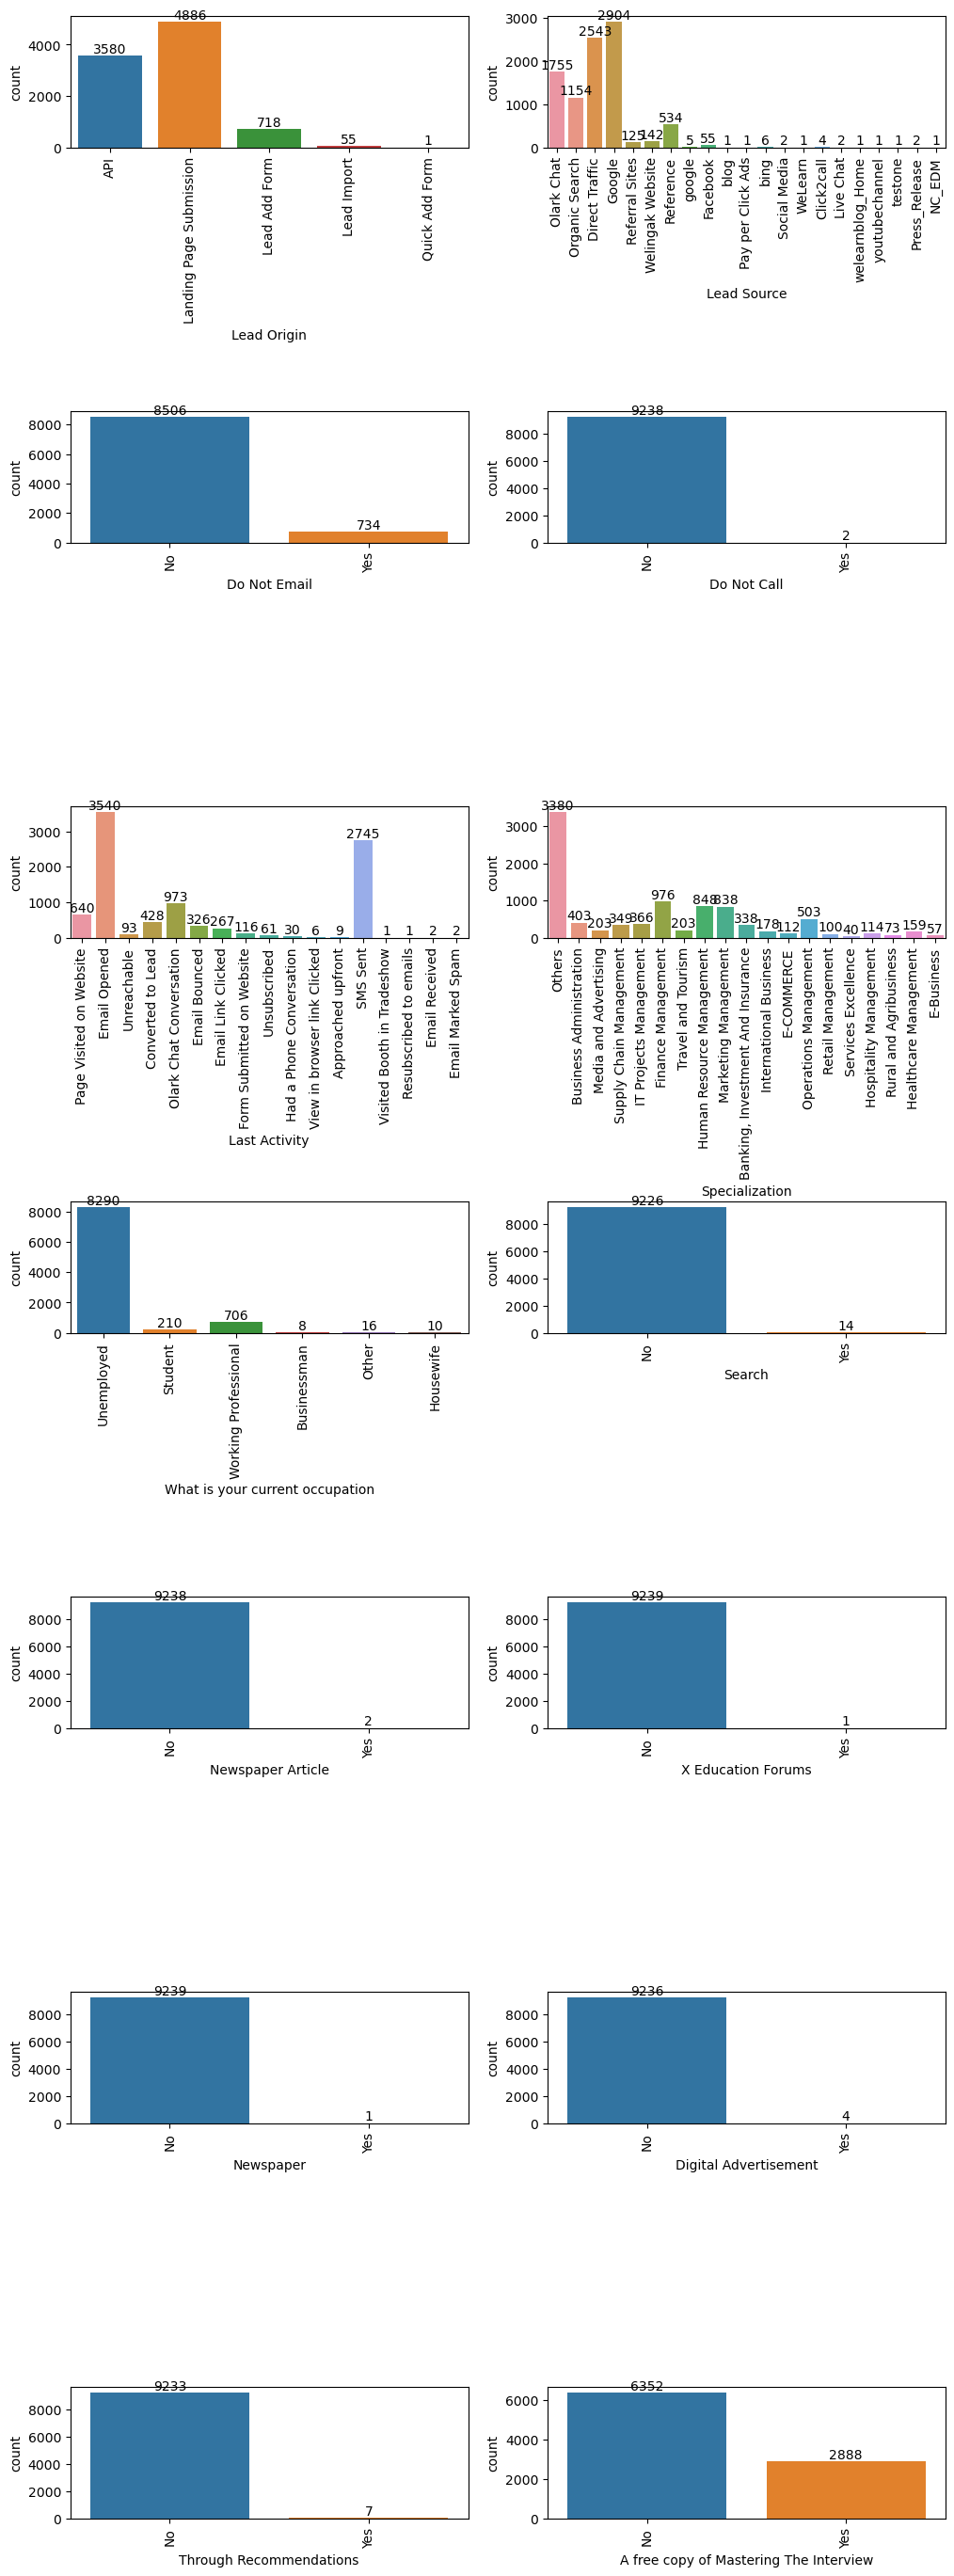

In [33]:
# Plotting countplot for object dtype and histogram for number to get data distribution
categorical_col=df_leads.select_dtypes(include = ["category", "object"]).columns.tolist()
plt.figure(figsize = (12,40))

plt.subplots_adjust(wspace = .2, hspace = 2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0] + 1)
    ax = sns.countplot(x = i[1], data = df_leads)
    plt.xticks(rotation = 90)
    
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = "center", va = "center", xytext = (0, 5), textcoords = "offset points")
        
plt.show()

<font color = "red">Note:</font> Following columns have data which is highly skewed,

- "Do Not Call",
- "Search",
- "Newspaper Article", 
- "X Education Forums",
- "Newspaper",
- "Digital Advertisement",
- "Through Recommendations"

Hence these columns will be dropped as they will not add any value to the model. Moreover, Skewed variables can affect the performance of logstic regression models, as they can lead to biased or inaccurate parameter estimates.

In [34]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ", df_leads.shape)
df_leads.drop(["Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations"], axis = 1, inplace = True)
print("After Drop: ", df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [35]:
# To refer the head leads
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

**Data is 🧹clean from missing values:**
- After data is cleaned lets standardise the values

**3.E) Outlier Analysis**

***For Numerical Columns***

In [36]:
def Check_Outliers(data, columnList):
    
    plt.figure(figsize = [22 , 11])
    plt.subplots_adjust(wspace = 0.4, hspace = 0.5)
    
    for i,j in enumerate(columnList):
        plt.subplot(2,2,i + 1)
        
        sns.boxplot(y = data[j]) #y=df_leads[j] to make plot verticle
        
        plt.suptitle("\nChecking Outliers using Boxplot", fontsize = 20, color = "green")
        plt.ylabel(None)
        plt.title(j, fontsize = 15, color = 'purple' )

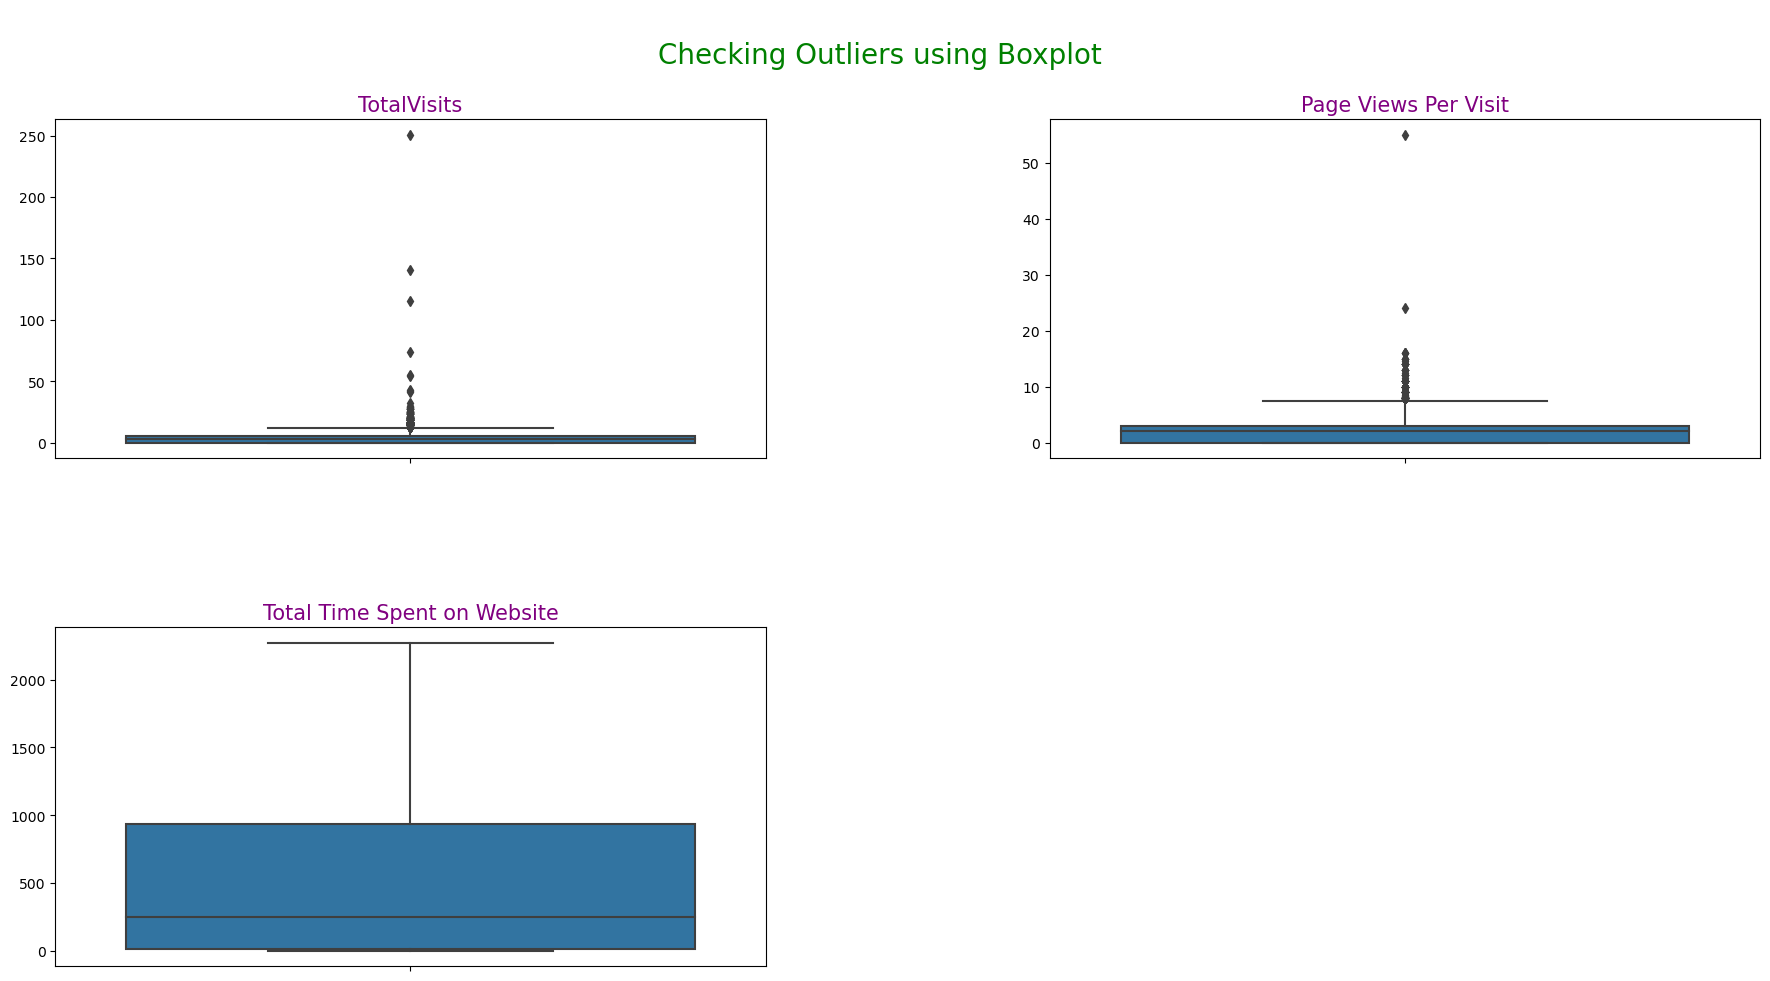

In [37]:
# Checking outliers for nunmerical variables other than target variable 
num_colns = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

# UDF
Check_Outliers(df_leads, num_colns)

**Insights:**

**"TotalVisits"**
, **"Page Views Per Visit"**. Both these variables contain outliers as can be seen in boxplot So, These outliers needs to be treated for these variables

***Capping Outliers for the treatment***

In [38]:
# Before the outlier treatment
df_leads.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [39]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df, columnList):
    for i in columnList:
        q1=df[i].describe()["25%"]
        q3=df[i].describe()["75%"]
        IQR=q3 - q1
        
        upper_bound=q3 + 1.5*IQR
        lower_bound=q1 - 1.5*IQR
        
        #here capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
        
        #here capping lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

In [40]:
# Checking outliers for numerical variables other than target variables
capping_colns = ["TotalVisits", "Page Views Per Visit"]

# UDF
Outlier_treatment(df_leads, capping_colns)

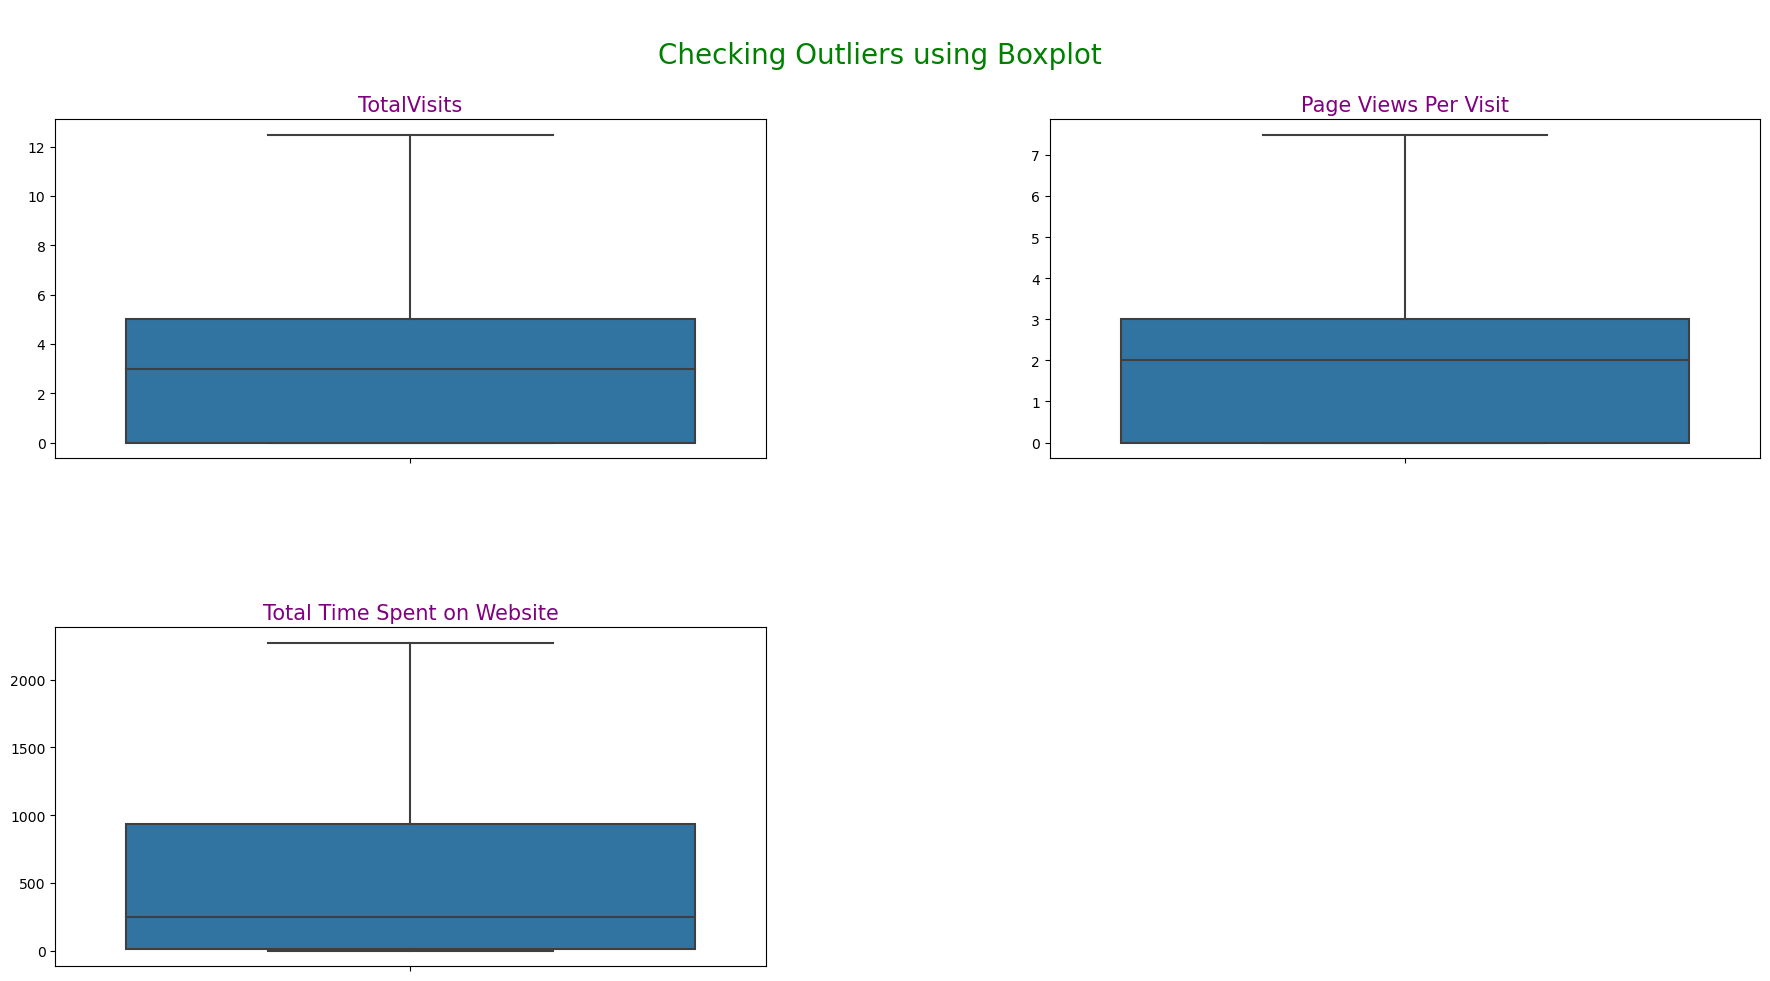

In [41]:
# Checking Boxplot after Outlier Treatment

num_colns = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

# UDF for the boxplot
Check_Outliers(df_leads, num_colns)

In [42]:
# After the outlier tretment detailed percentile values
df_leads.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

***3.F Fixing Invalid Values and Standardising Data in Columns***

- Checking if the entries in the data are in correct format or not, casing styles (UPPER, lower)
- Checking data types of columns

In [43]:
# referring the heads
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [44]:
# Categorical Variables

columnsList_cat = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]

for i in columnsList_cat:
    perc = 100*df_leads[i].value_counts(normalize = True)
    print("value_counts % for :", i, "\n")
    print(perc, "\n")
    print("_*_" *25, "\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM     

<font color = 'red'>Note:</font> 
- Have noticed that some categories/levels in the **"Lead Score"** and **"Last Activity"** columns have very few records. To prevent ending up with a bunch of unnecessary columns when we created dummy variables, we are planning to group these categories together under "Other". That way, we can keep things neat and tidy.

- Also we can see **"Google" & "google"** are same inn **"Lead Source"**, so we will standardise the case.

***3.F.1 Grouping Low Frequency Values***

In [45]:
# Grouping low frequency value levels to others
df_leads["Lead Source"]=df_leads["Lead Source"].replace(["bing", "Click2call", "Press_Release", "Social Media", "Live Chat", "youtubechannel", "testone", "Pay per Click Ads", "welearnblog_Home", "Welearn", "blog", "NC_EDM"], "Others")

# Changing google to Google
df_leads["Lead Source"]=df_leads["Lead Source"].replace("google", "Google")

In [46]:
# Value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize = True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.238095
WeLearn              0.010823
Name: Lead Source, dtype: float64

In [47]:
# Grouping low frequency value levels to others
df_leads["Last Activity"]=df_leads["Last Activity"].replace(["Unreachable", "Unsubscribed", "Had a Phone Conversation", "Approached upfront", "View in browser link Clicked", "Email Marked Spam", "Email Received", "Visited Booth  in Tradeshow", "Resubscribe to emails"], "Others")

In [48]:
#value_counts percentage after replace
df_leads["Last Activity"].value_counts(normalize = True)*100

Email Opened                  38.311688
SMS Sent                      29.707792
Olark Chat Conversation       10.530303
Page Visited on Website        6.926407
Converted to Lead              4.632035
Email Bounced                  3.528139
Email Link Clicked             2.889610
Others                         2.196970
Form Submitted on Website      1.255411
Visited Booth in Tradeshow     0.010823
Resubscribed to emails         0.010823
Name: Last Activity, dtype: float64

In [49]:
# Remaining column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns = {"A free copy of Mastering The Interview": "Free_copy"}, inplace = True)

#Remaining columns name to "Current_occupation" from "What is your current occupation A Free Copy of Mastering the Interview"
df_leads.rename(columns = {"What is your current occupation": "Current_occupation"}, inplace = True)

<font color = "red">Note:</font> 
- "Do Not Email" and "Free_copy" both are binary categorical columns lets map both of them **yes** or **No** to **1** or **0**

***3.F.2 Mapping Binary categorical Variables***

In [50]:
# Mapping Binary Categorical Variables
df_leads["Do Not Email"]=df_leads["Do Not Email"].apply(lambda x: 1 if x == "Yes" else 0)

df_leads["Free_Copy"]=df_leads["Free_copy"].apply(lambda X: 1 if X == "Yes" else 0)

***3.F.3 Checking Data-types of Variables***

In [51]:
# Referring for the information
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   object 
 11  Free_Copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 866.4+ KB


<font color = "red">Note:</font> Data types appear to be suitable and no modifications are necessary/required to be done 

# <font color = "purple">Step 4: Exploratory Data Analysis</font>

***4.A) Checking if Data is Imbalanced or not***

- Data is imbalance when one value is present majotrity and other is in minority meaning an uneven distribution of observations in dataset.

- Data imbalance is in the context of target variable only

- Target variable is "Converted" which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn't converted

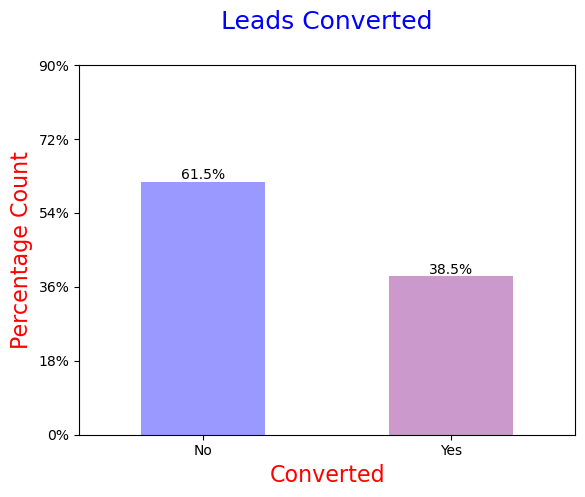

In [52]:
# Plotting the results using the bar plot
ax = (100*df_leads["Converted"].value_counts(normalize = True)).plot.bar(color = ["Blue", "Purple"], alpha = 0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict = {"fontsize": 18, "fontweight": 9, "color" : "Blue"})

# Labelling axes
plt.xlabel("Converted", fontdict = {"fontsize" : 16, "fontweight": 28, "color" : "red"})
plt.ylabel("Percentage Count", fontdict = {"fontsize" : 16, "fontweight": 28, "color" : "red"})

# Modification ticks y-axis
ticks = np.arange(0, 100, 18)
labels = ["{:.0f}%". format(i) for i in ticks]
plt.yticks(ticks, labels)

#xticks
plt.xticks([0,1],["No", "Yes"])
plt.xticks(rotation = 0)

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext=(0,5), textcoords = "offset points")
    
plt.show()

***Insights:***

- Conversion rate is of **38.5%**, meaning only the 38.5% of the people have converted to leads._[The Minority]_
- While **61.5%** of people didnt convert to leads. _[The Majority]_

In [53]:
# Ratio of the Data Imbalance
ratio = (df_leads["Converted"].value_counts(normalize = True).loc[0])/(df_leads["Converted"].value_counts(normalize = True).loc[1])
print("Data Imbalance Ratio : {:.2f} : {}". format(ratio, 1))

Data Imbalance Ratio : 1.59 : 1


***4.B) Univariate Analysis***

In [54]:
# Referring the heads here
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_copy  Free_Copy  
0        No          0  
1        No          0  
2       Yes          1  
3        No          0  
4        No          0

***4.B.1 Univariate Analysis for Categorical Cariables***

In [55]:
# List of categorical columns
cat_colns=["Lead Origin", "Current_occupation", "Do Not Email", "Free_Copy", "Lead Source", "Last Activity", "Specialization"]

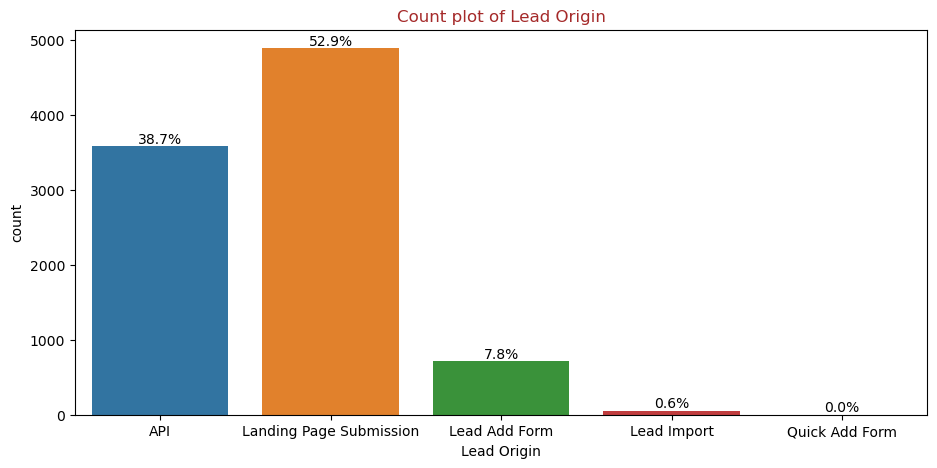

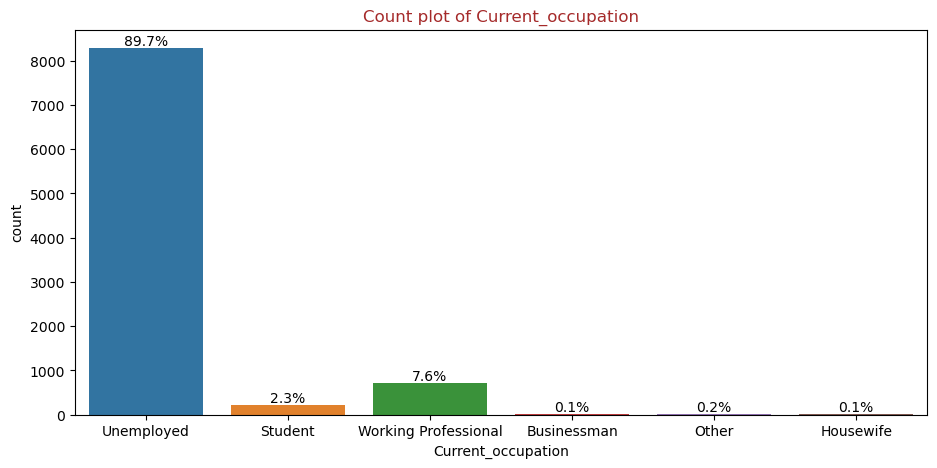

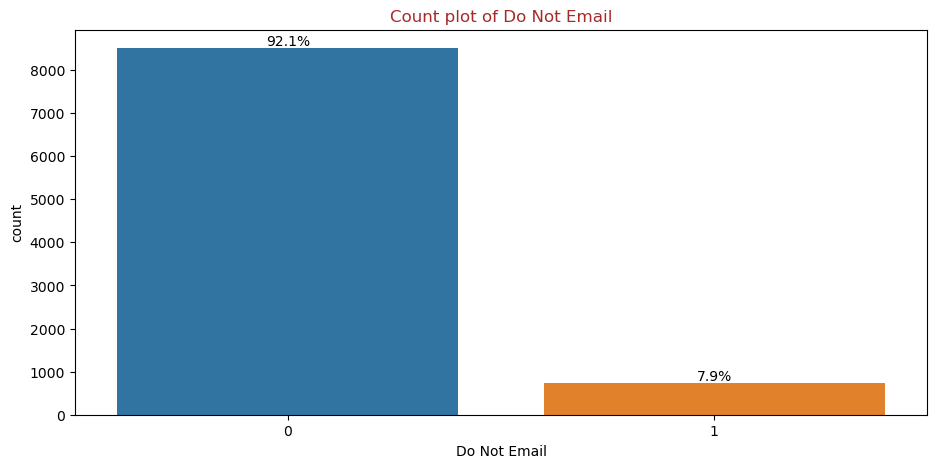

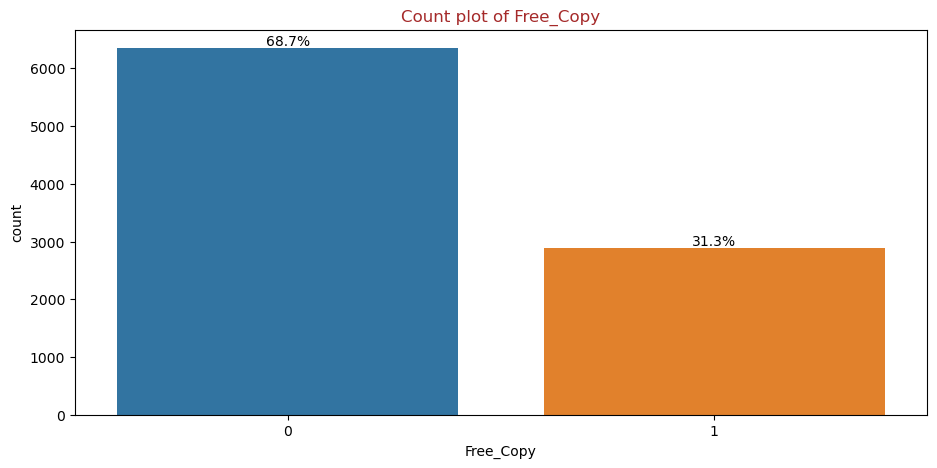

In [56]:
# Count plot of the columns with its value_counts percentage as annotation
for i in cat_colns[:4]:
    plt.figure(figsize = [11,5])
    plt.title("Count plot of {}". format(i), color = "Brown")
    ax = sns.countplot(x = i, data = df_leads)
    total = len(df_leads[i])
    plt.xticks(rotation = 0)
    
    for p in ax.patches:
        text = "{:.1f}%".format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        
        ax.annotate(text, (x,y), ha="center", va="center", xytext=(0 , 5), textcoords="offset points")

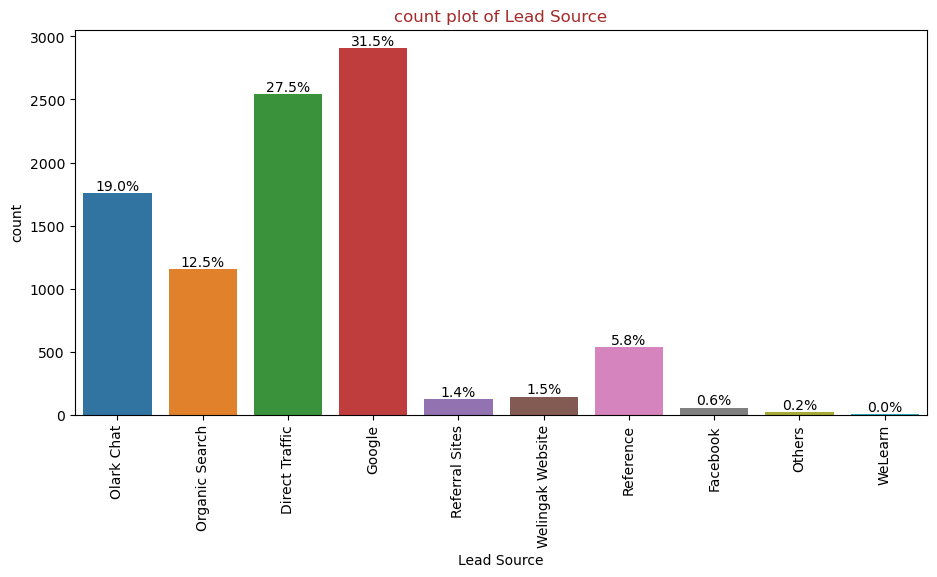

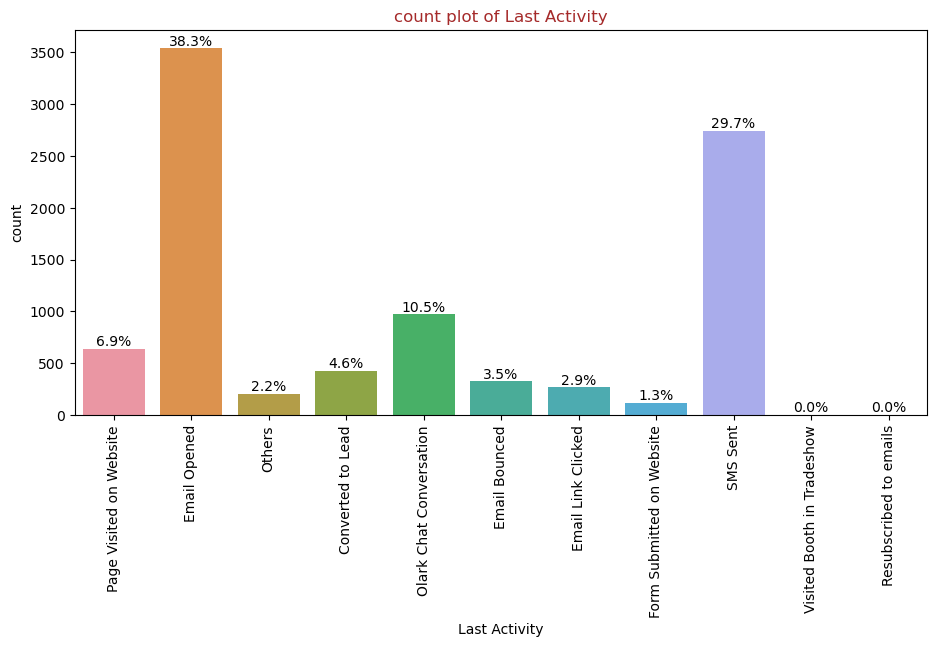

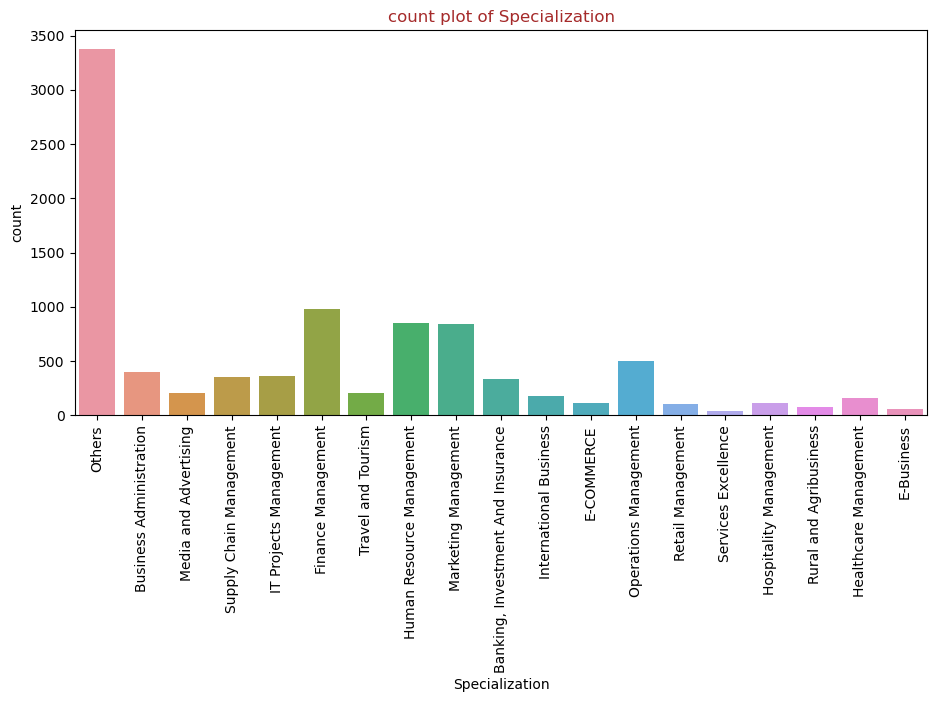

In [57]:
#Barplot for remaining columns from cat_colns - Did the separate to rotate xticks 90 degree, so labels doesn't become mess)
for i in cat_colns[4:]:
    
    plt.figure(figsize = [11, 5])
    plt.title("count plot of {}".format(i), color = "Brown")
    ax = sns.countplot(x = i, data = df_leads)
    total = len(df_leads[i])
    plt.xticks(rotation = 90)
    
    if i!="Specialization":
        for p in ax.patches: 
            text="{:.1f}%".format(100*p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            
            ax.annotate(text, (x,y), ha="center", va="center", xytext = (0, 5), textcoords="offset points")
        else:
            pass

***Observations:***

- In the categorical Univariate Analysis we get to know the value counts percentage in each of variable that how much is the distribution of values in each column.

- Coinnecting with this we get some of understanding that which variables can be used in **Bivariate Analysis**.


***Insights of Univariate:***

**_Here is the list of feature from variables which are present in majority here[Converted and Not Converted included]_**

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%.

- **Current_occupation:** It has 90% of the customer as Unemployed.

- **Do Not Email:** 92% of the people has opted that they don't want to be Emailed about course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined.

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened Activities.

<font color = "red">Note:</font> All these insights will be helpful in further **Bivariate Analysis**.

***4.C) Bivariate Analysis***

- Bivariate Analysis happens between two variables.

***4.C.1 Bivariate Analysis for Categorical Variables***

In [58]:
# UDF "Bivariate_cat" tells comparition between Actual Distribution (value_count percentage) from the data and the 2nd graph tell the Lead Conversion Rate in percentage (How much Leads are converted from 1st plot distribution)

def Bivariate_cat(df, variable_name, Target = "Converted"):
    plt.figure(figsize = (20, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color = "Green", fontsize = 18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name), color="Brown")
    ax = sns.countplot(x = variable_name, hue = Target, data = df_leads, palette = "prism_r", alpha = 0.46)
    
    total = len(df_leads[variable_name])
    plt.xticks(rotation = -90)
    plt.legend(["No", "Yes"], title="Converted")
    
    # Annotation for 1st plot
    for p in ax.patches:
        text="{:.1f}%".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha="center", va="center", xytext = (0, 10), textcoords = "offset points")
        
        # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color = "Blue", fontsize = 12)
    ax = sns.countplot(x = variable_name, hue=Target, data=df, palette = "BuGn", alpha = 0.85) #ax1 is for annotation
        
        #Modifications
    plt.xticks(rotation = -90)
    plt.ylabel("Count", color="Green")
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title = "Lead Conversion Rate")
        
        # Annotation for 2nd plot
        # Calculate percentage above bars in countplot (conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    #print(all_heights)
    for bars in ax.containers: 
        for i, p in enumerate(bars): 
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f"{(100 * p.get_height() / total) :.1f}%"
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha = "center", va = "bottom")
                

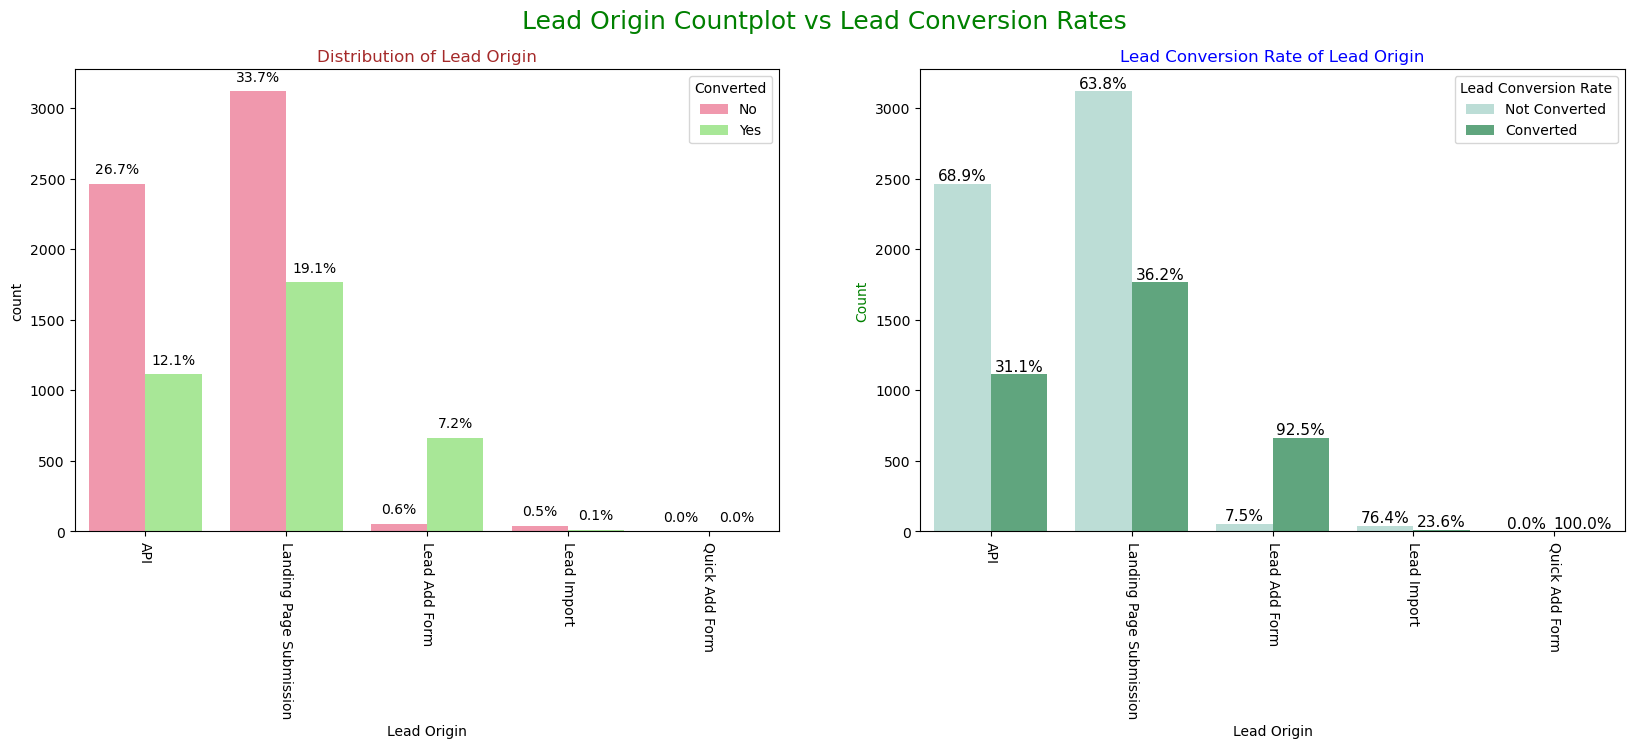

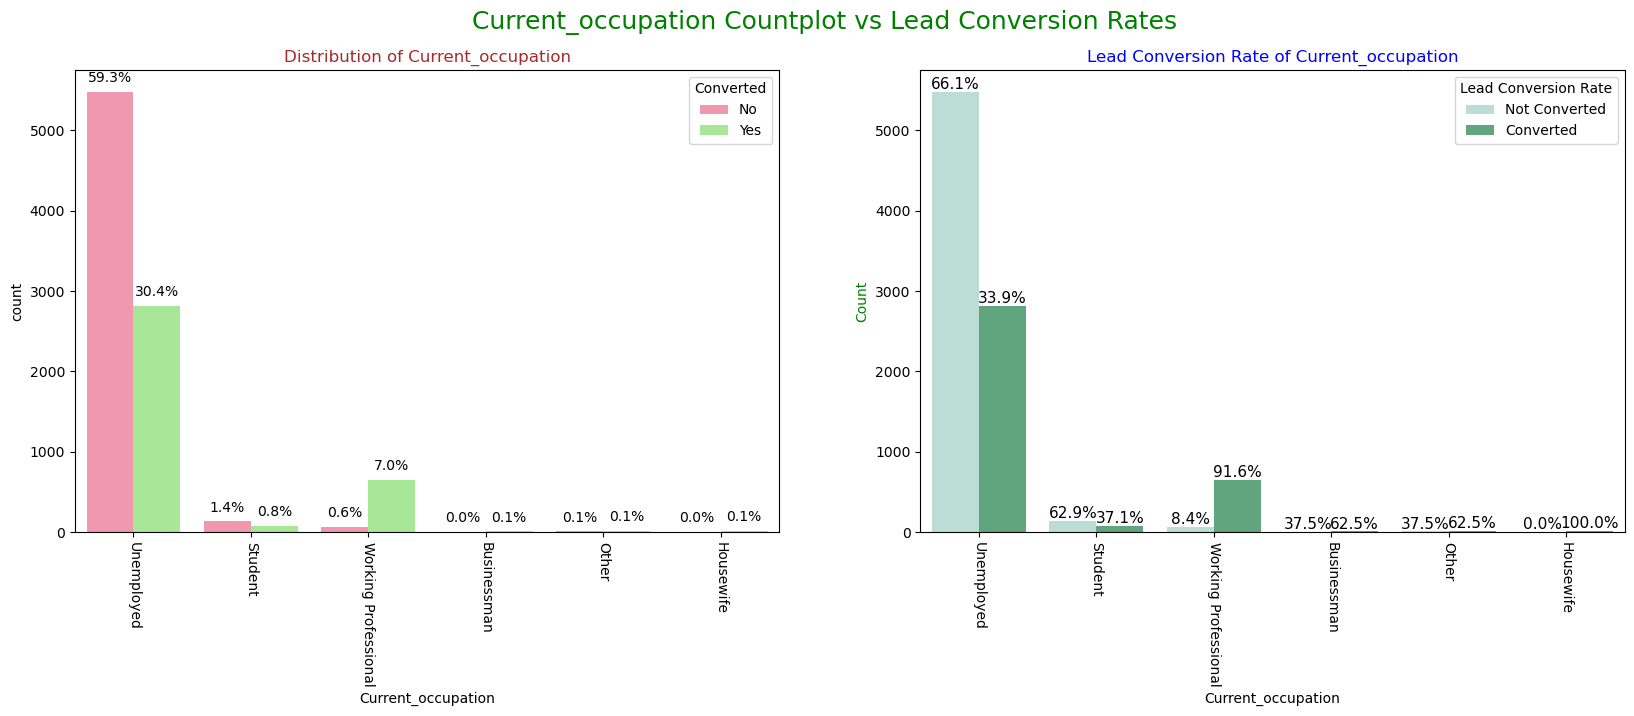

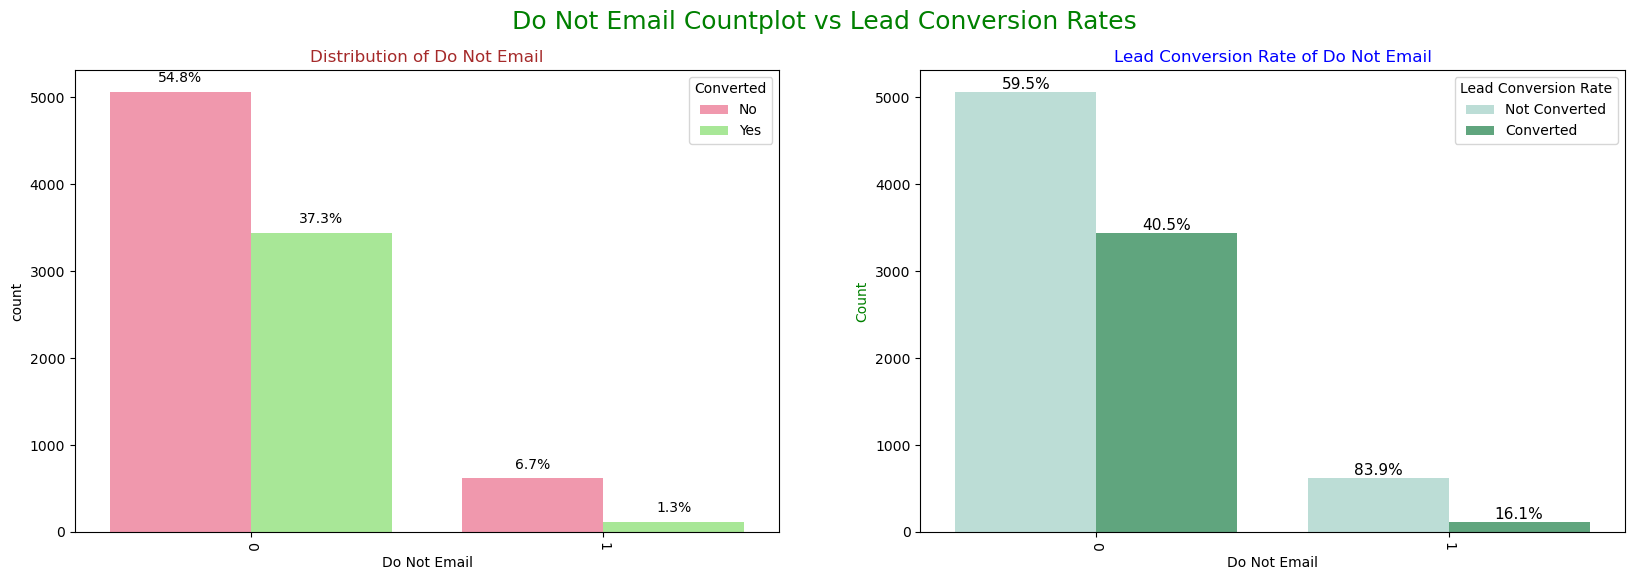

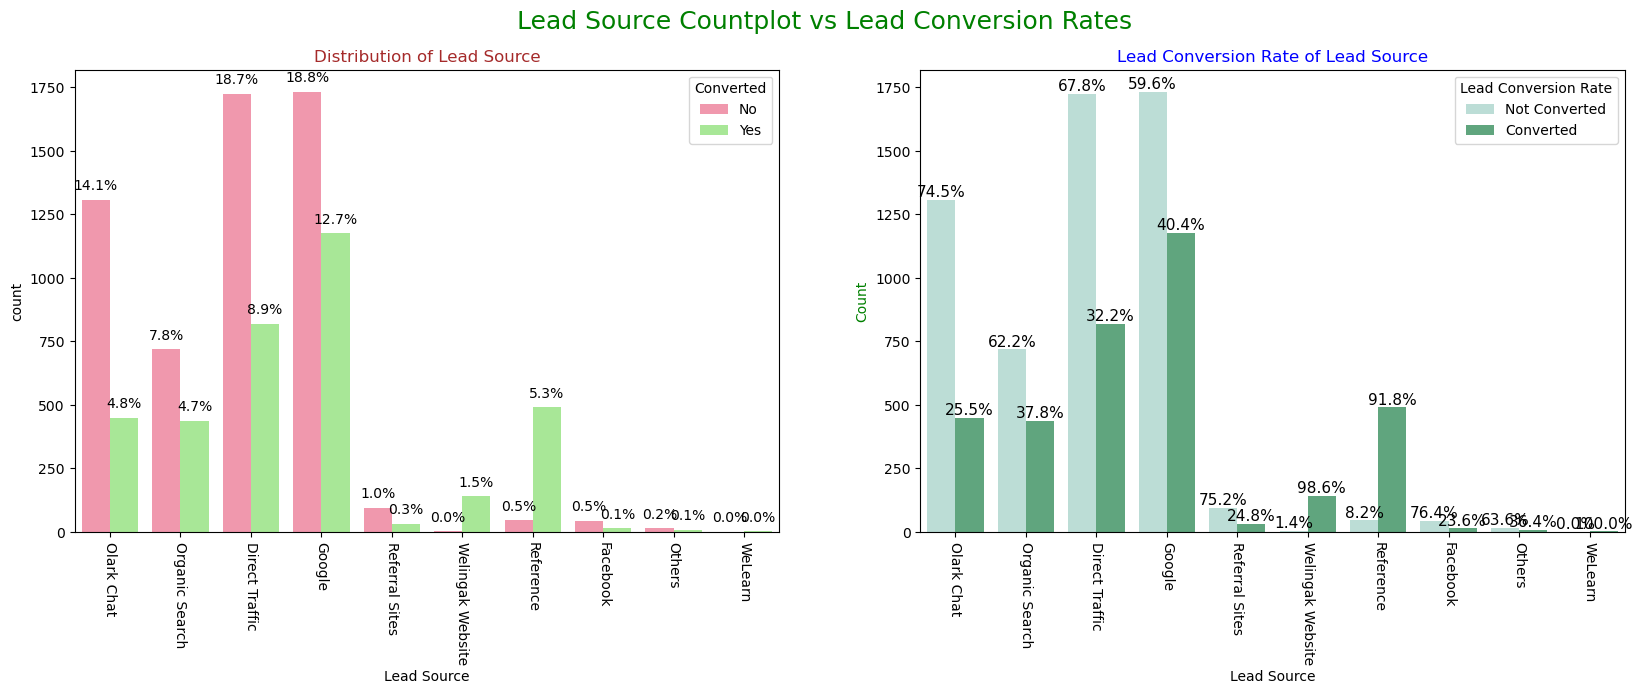

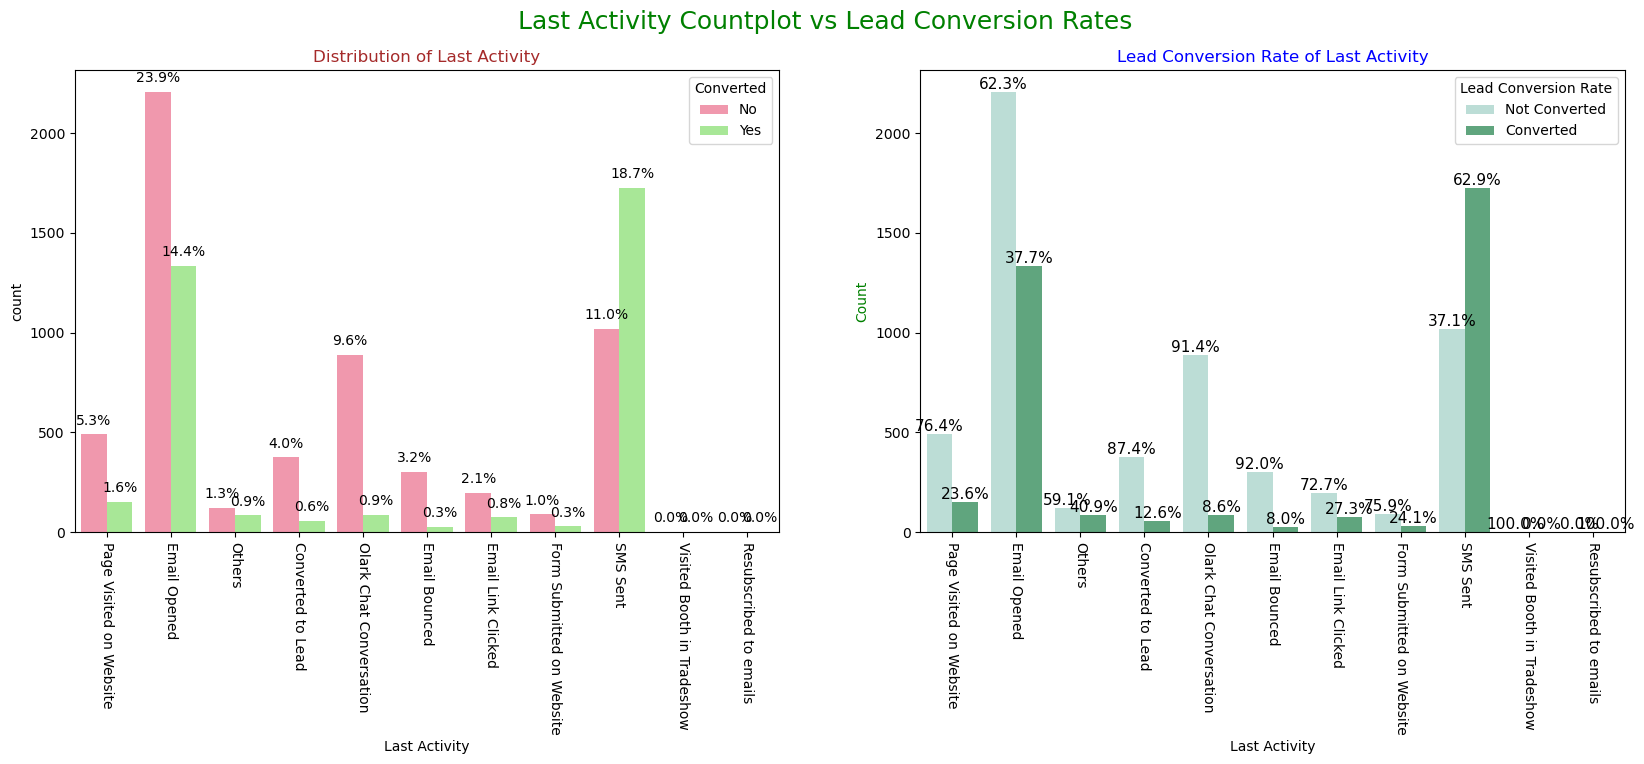

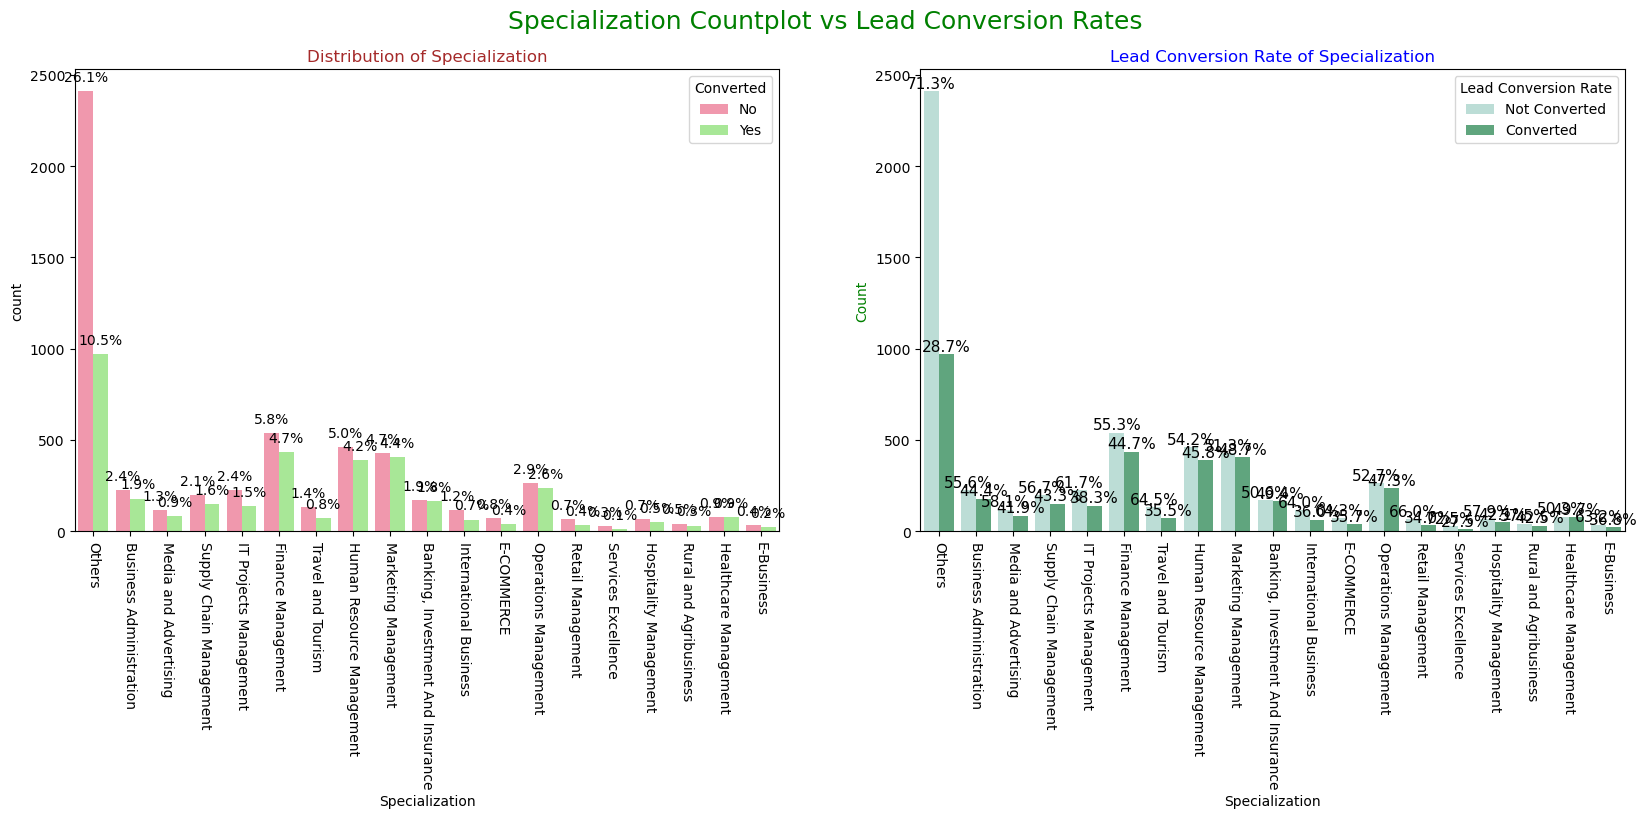

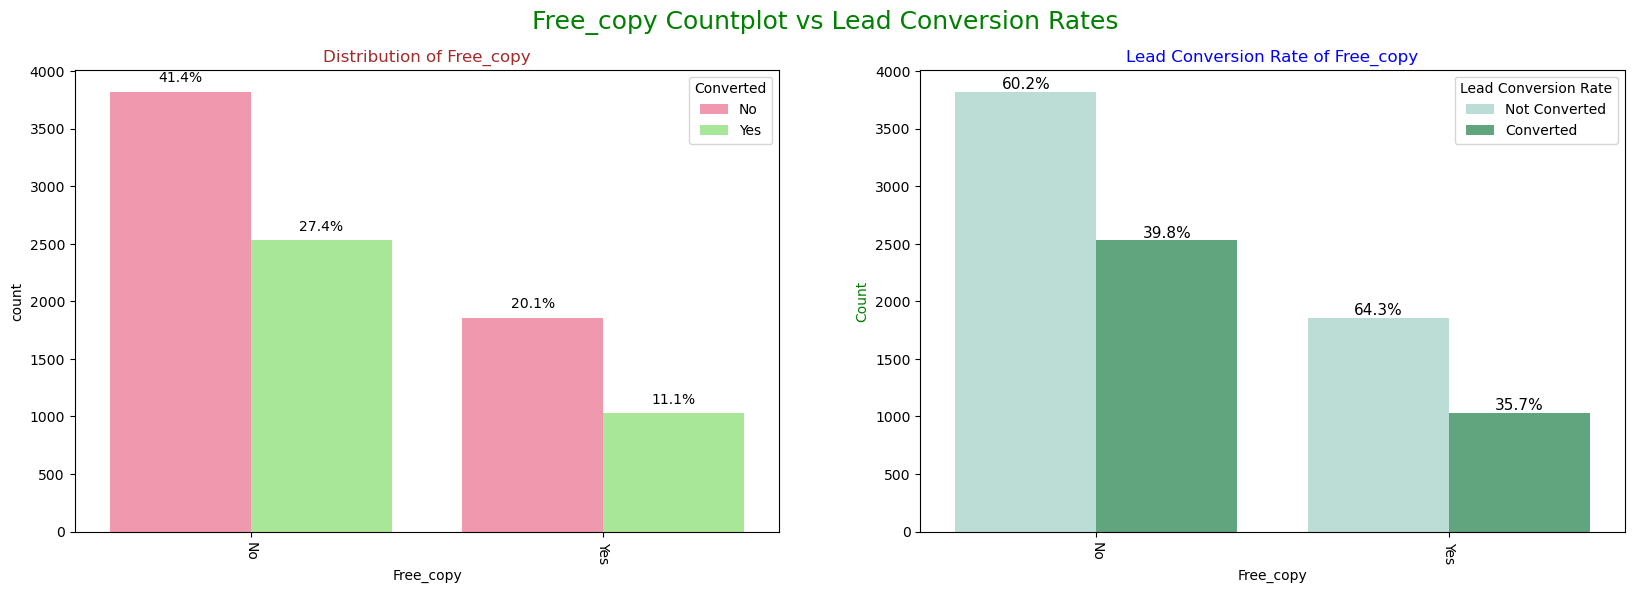

In [59]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables with respect to "Converted" (Target variable), taking one categorical column with repect to target variables as "hue"
cat_colns=["Lead Origin", "Current_occupation", "Do Not Email", "Lead Source", "Last Activity", "Specialization", "Free_copy"]

for i in cat_colns:
    Bivariate_cat(df_leads, variable_name=i)


***Insights:***

- **Lead Origin-** Around 52% of all leads originated from "Landing Page Submission" with a Lead Conversion Rate (LCR) of 36%. The "API" identified approximately 39% of customer with a Lead Conversion Rate (LCR) of 31%.


- **Current_occupation-** Around 90% of the customers are Unemployed with Lead Conversion Rate (LCR) of 34%. While working Profession contribute only 7.6% of total customers with almost 92% Lead  Conversion Rate (LCR).


- **Do Not Email-** 92% of the people has opted that they dont want to be emailed about the course.

<font color = "red">Note:</font> We have assumed LCR as Lead Conversion Rate in short form.

--------------------------------------------------------------------------------------------------------------------------------

- **Lead Source-** Google has LCR of 40% out of 31% customers, Direct Traffic contributes 32% LCR with 27% customers which is lower than Google, Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers,  Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.


- **Last Activity-** "SMS Sent" has High Lead Conversion Rate of 63% with 30% contribution from last activities, "Email Opened" activity contribution 38% of last activity performed by the customers with 37% lead conversion rate.


- **Specialization-** Marketing Management, HR Management, Finance Management shows good contribution.

***4.C.2 Bivariate Analysis for Numerical Variables***

<Figure size 1600x400 with 0 Axes>

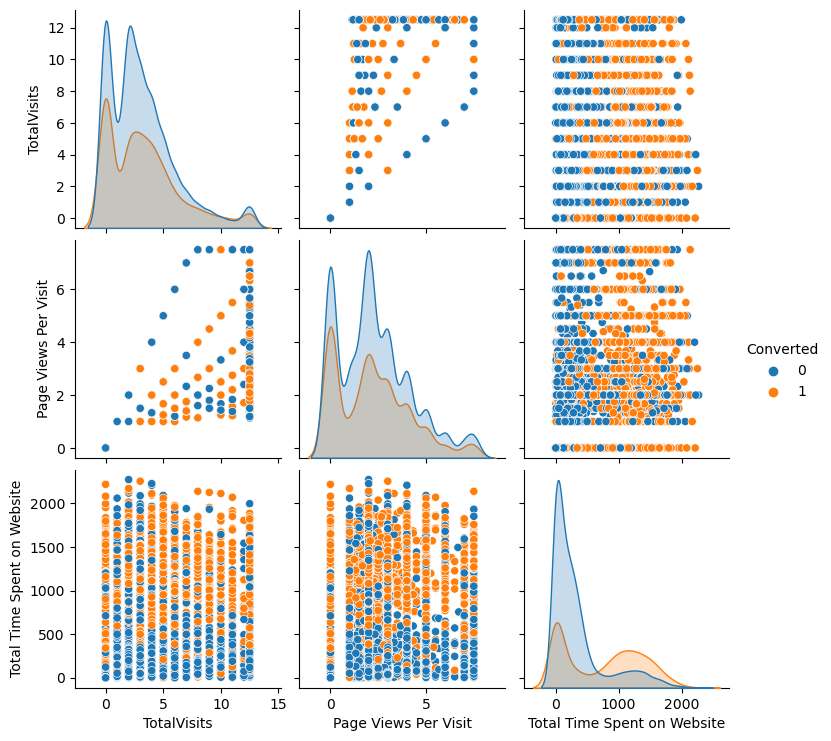

In [60]:
plt.figure(figsize = (16, 4))
sns.pairplot(data = df_leads, vars = num_colns, hue = "Converted")
plt.show()

In [61]:
num_colns = ["Converted", "TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

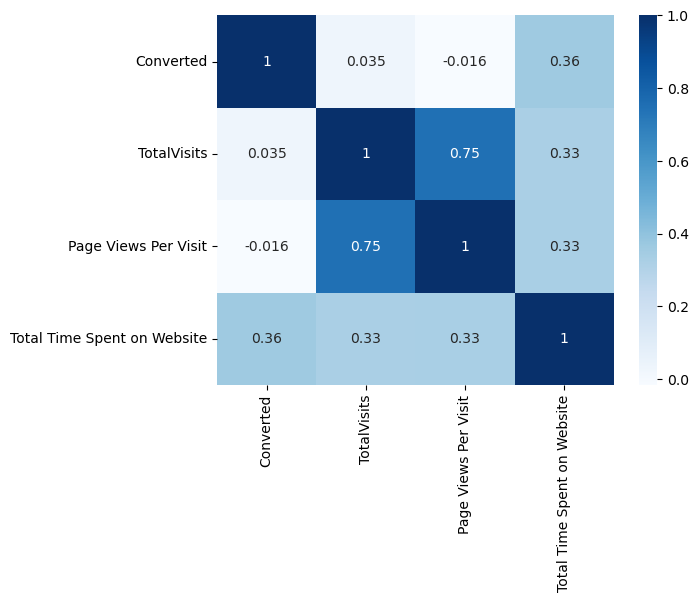

In [62]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data = df_leads[num_colns].corr(), cmap = "Blues", annot = True)
plt.show()

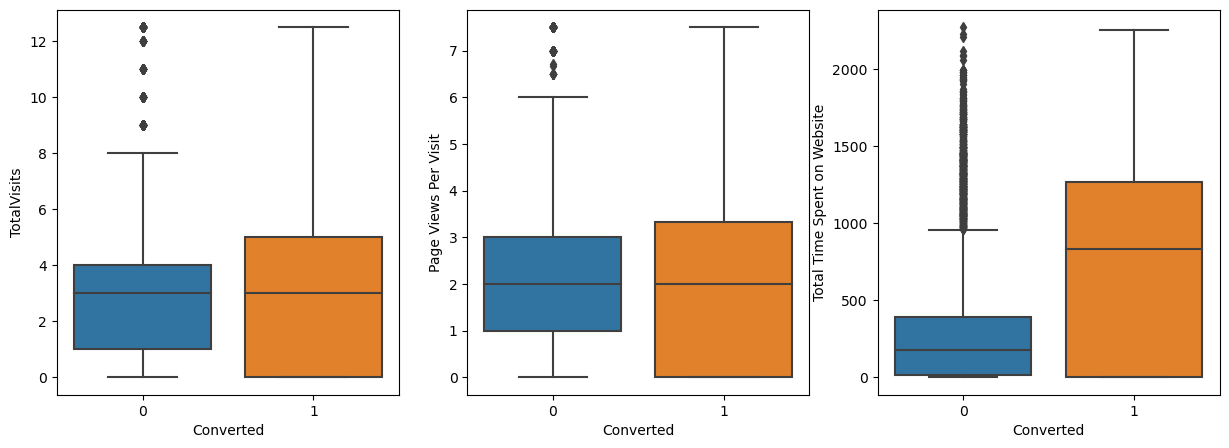

In [63]:
# Boxplot with Converted as hue

plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits", x = "Converted", data = df_leads)

plt.subplot(1,3,2)
sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = df_leads)

plt.subplot(1,3,3)
sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = df_leads)

plt.show()



***Insights:***

- Past Leads who spends more time on website  are successfully converted than those who spends less as seen in the boxplot

# <font color = "purple">Step 5: Data Preperation</font>

***5.A) Dummy Variables***

- For the categorical variables with multiple levels, create dummy features(one-hot encoded)

**Binary level categorical column are already mapped to 1/0 in previous steps, So start with Dummy Variable Creation**

In [64]:
# Referring of heads
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_copy  Free_Copy  
0        No          0  
1        No          0  
2       Yes          1  
3        No          0  
4        No          0

In [65]:
# Creating a dummy cariable for some of the categorical variables and dropping the first one.

Dummy=pd.get_dummies(df_leads[["Lead Origin", "Lead Source", "Last Activity", "Specialization", "Current_occupation"]], drop_first = True) 

# Adding the results to the master dataframe
df_leads=pd.concat([df_leads,Dummy], axis = 1)

In [66]:
# Referring of heads
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_copy  Free_Copy  Lead Origin_Landing Page Submission  \
0        No          0                                    0   
1        No          0                                    0   
2       Yes          1                                    1   
3        No          0                                    1   
4        No          0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   0   
3                           0                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  Lead Source_WeLearn  \
0                      0                           0                    0   
1                      0                           0                    0   
2                      0                           0                    0   
3                      0                           0                    0   
4                      0                           0                    0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0        

In [67]:
# We have created dummies for the below variables, so we can drop them
df_leads = df_leads.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "Current_occupation"],1)

In [68]:
df_leads.shape

(9240, 53)

In [69]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   object 
 6   Free_Copy                                 9240 non-null   int64  
 7   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 9   Lead Origin_Lead Import                   9240 non-null   uint8  
 10  Lead Origin_Quick Add Form          

# <font color = "Purple">Step 6: Test-Train Split</font>

In [70]:
# Putting predictor variables to x
X=df_leads.drop("Converted", axis = 1)

# Putting Target variables to y
Y = df_leads["Converted"]

In [71]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
print("X_train:", X_train.shape, "\nY_train:", Y_train.shape)

X_train: (6468, 52) 
Y_train: (6468,)


In [73]:
print("X_test:", X_test.shape, "\nY_test:", Y_test.shape)

X_test: (2772, 52) 
Y_test: (2772,)


# <font color = "purple">Step 7: Feature Scaling</font>

In [74]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Featuring int64 and float64 dtype columns from dataframe for scaling
num_colns = X_train.select_dtypes(include = ["int64", "float64"]).columns

X_train[num_colns] = scaler.fit_transform(X_train[num_colns])

In [75]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit Free_copy  Free_Copy  \
1871             -1.184892        No  -0.673169   
6795             -0.488713       Yes   1.485511   
3516              0.123715        No  -0.673169   
8105              1.432322        No  -0.673169   
3934             -1.184892        No  -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_WeLearn  \
1871                           0                    0   
6795                           0                    0   
3516                           0                    0   
8105                           0                    0   
3934                           0                    0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                    

In [76]:
# Checking the Lead Conversion Rate (LCR)- "Converted" is our Target Variable
#  We will denote Lead Conversion Rate with "LCR" as its short form

LCR=(sum(df_leads["Converted"])/len(df_leads["Converted"].index))*100
LCR

38.53896103896104

<font color = "red">Note:</font> We have 38.5% Conversion Rate

***7.A) Looking at Correlations***
- Feature elimination based on the correlations

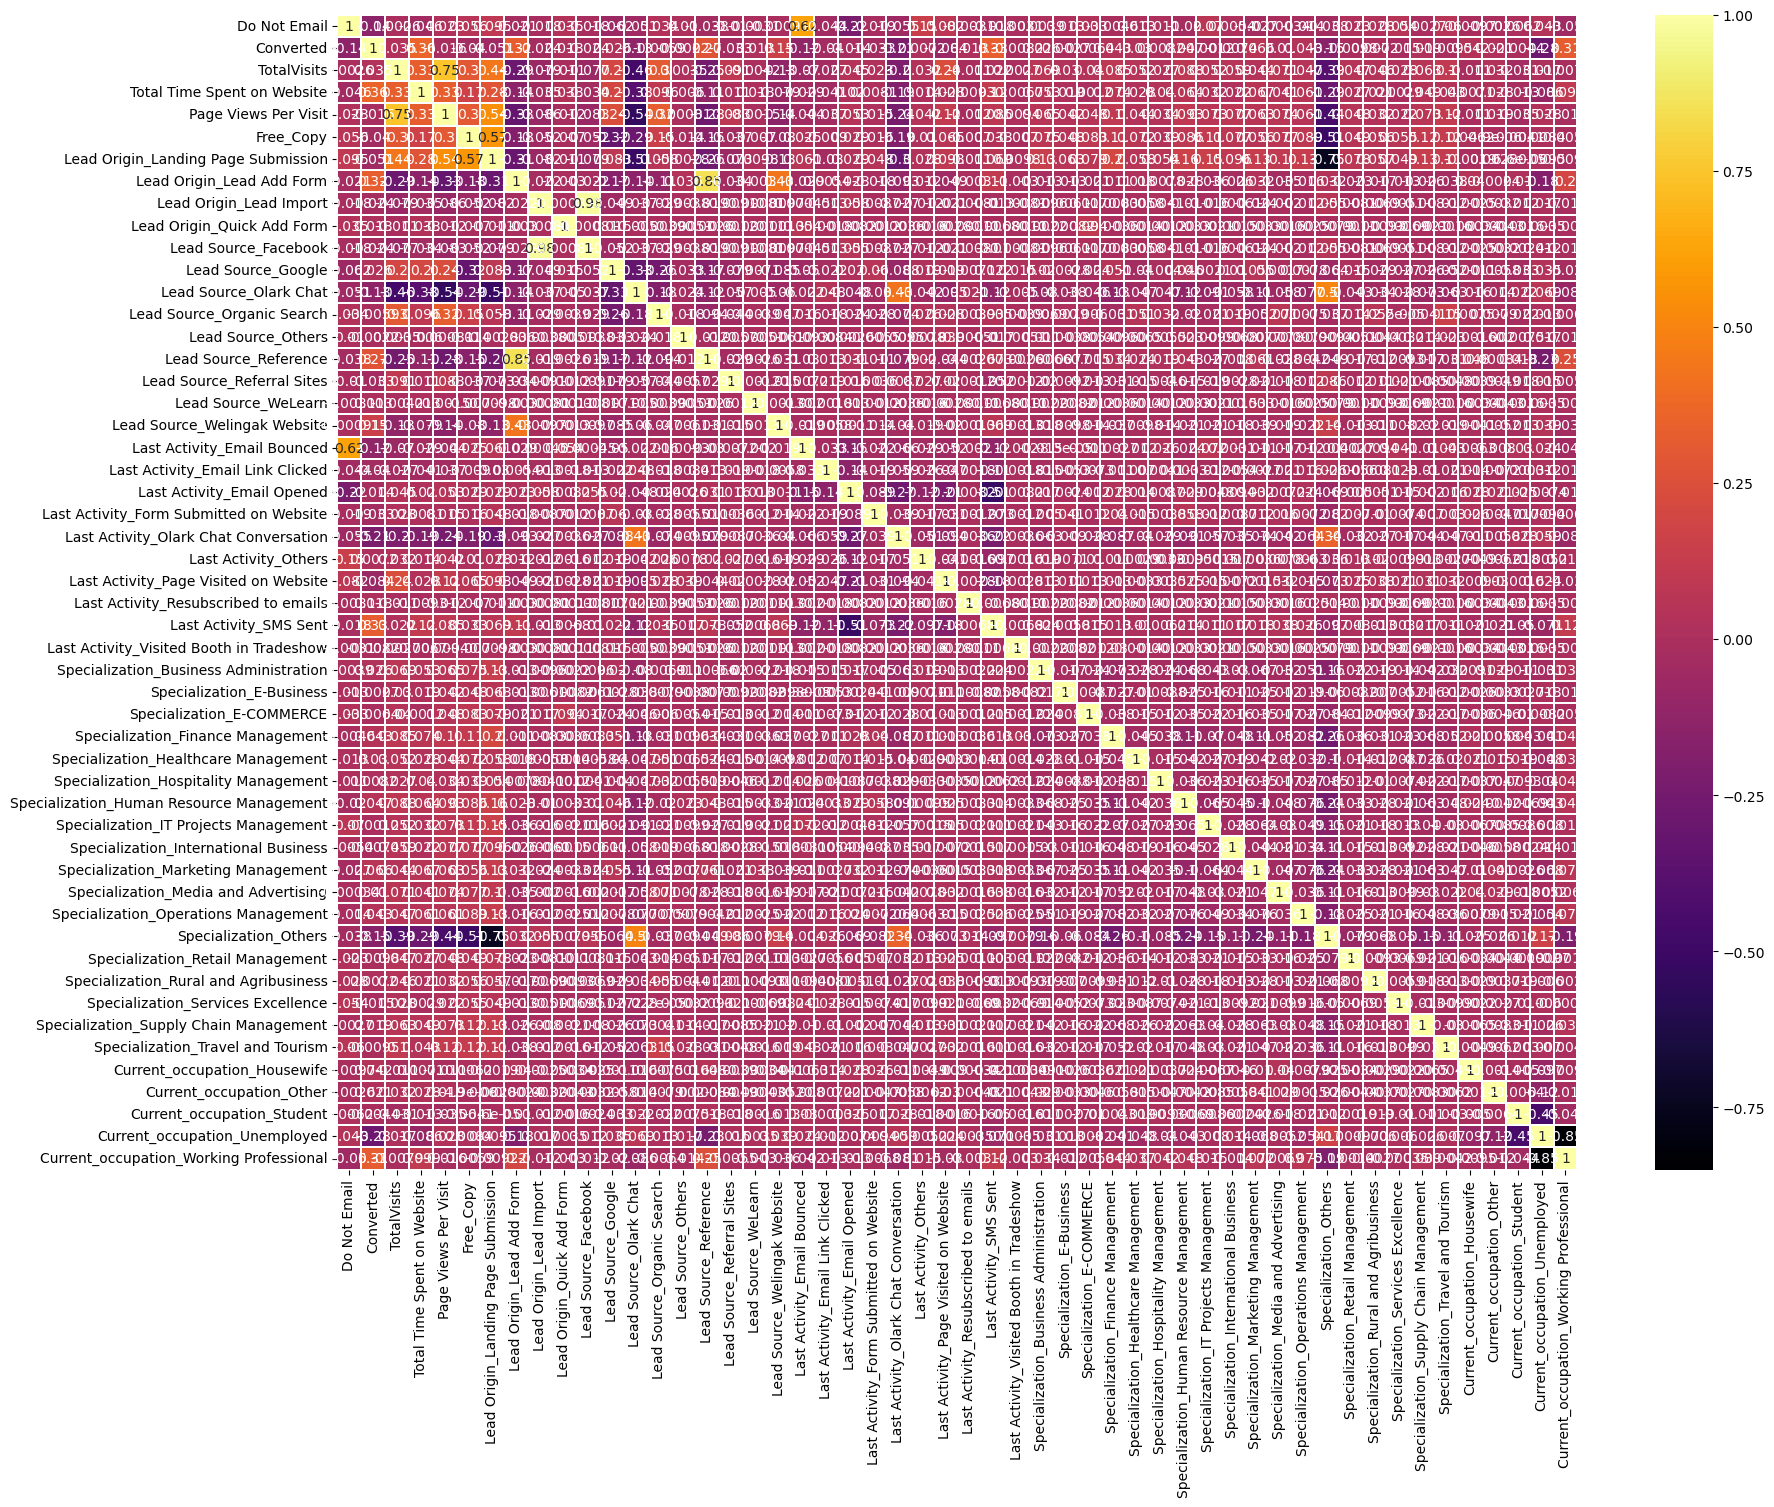

In [77]:
# Analyse correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df_leads.corr(), linewidths = 0.01, cmap = "inferno" , annot = True)

plt.show()

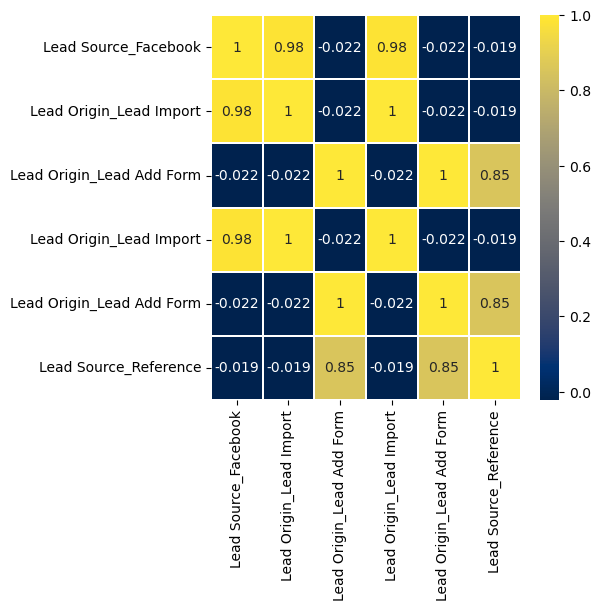

In [78]:
# As the above heatmap has so many columns lets breakdown suspected variables which might high correlataion with each 
# Analysing variables which might be highly correlated with each other from same class from above graph
corr_matrix = df_leads[["Lead Source_Facebook", "Lead Origin_Lead Import", "Lead Origin_Lead Add Form","Lead Origin_Lead Import", "Lead Origin_Lead Add Form","Lead Source_Reference"]].corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_matrix, linewidths = 0.01, cmap = "cividis", annot = True)
            
plt.show()

<font color = "red">Note:</font> These predictor variables above are very highly correlated with each other near diagnol with the(0.98 & 0.85), it is better that we drop one of these variables from each pair  as they won't add much value to the model. So, we can drop any of them, let's drop "Lead Origin_Lead Import" and "Lead Origin_Lead Add Form"

In [79]:
X_test = X_test.drop(["Lead Origin_Lead Import", "Lead Origin_Lead Add Form"], 1)

X_train = X_train.drop(["Lead Origin_Lead Import", "Lead Origin_Lead Add Form"], 1)

# <font color = "purple">Step 8: Model Building</font>

- Will building Logistic Regression Model for predicting variable
- Feature Selection Using RFE(Coarse tuning)
- Manual fine-tuning using p-values and VIF's

***8.A) Feature Selection Using RFE (Recursive Feature Elimination)***

In [80]:
# Let's use RFE to teduce the variables
from sklearn.preprocessing import LabelEncoder

# To Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Encoded categorical variable in X_train
X_train_encoded = X_train.apply(encoder.fit_transform)

#Fitting the logistic regression model with RFe on encoded features
logreg = LogisticRegression()
rfe=RFE(logreg, n_features_to_select = 15)
rfe=rfe.fit(X_train_encoded, Y_train)

In [81]:
# Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', False, 34),
 ('Page Views Per Visit', False, 32),
 ('Free_copy', False, 18),
 ('Free_Copy', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_WeLearn', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 33),
 ('Last Activity_Resubsc

In [82]:
# Instead of using as zip using this for more readablility

# Checking the top 15 features chosen by RFE

top15 = pd.DataFrame()

top15["features"] = X_train.columns
top15["Feature Chosen"] = rfe.support_
top15["Ranking"] = rfe.ranking_

top15.sort_values(by = "Ranking")

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
45              Current_occupation_Housewife            True        1
39                     Specialization_Others            True        1
25                    Last Activity_SMS Sent            True        1
48             Current_occupation_Unemployed            True        1
22                      Last Activity_Others            True        1
21     Last Activity_Olark Chat Conversation            True        1
19                Last Activity_Email Opened            True        1
16              Lead Source_Welingak Website            True        1
13                     Lead Source_Reference            True        1
24      Last Activity_Resubscribed to emails            True        1
49   Current_occupation_Working Professional            True        1
7                 Lead Origin_Quick Add Form            True        1
8                       Lead Source_Facebook            True        1
6        Lead Origin_Landing Page Submission            True        1
47                Current_occupation_Student           False        2
32     Specialization_Hospitality Management           False        3
15                       Lead Source_WeLearn           False        4
35     Specialization_International Business           False        5
12                        Lead Source_Others           False        6
41     Specialization_Rural and Agribusiness           False        7
9                         Lead Source_Google           False        8
46                  Current_occupation_Other           False        9
20   Last Activity_Form Submitted on Website           False       10
31      Specialization_Healthcare Management           False       11
40          Specialization_Retail Management           False       12
5                                  Free_Copy           False       13
17               Last Activity_Email Bounced           False       14
27    Specialization_Business Administration           False       15
42        Specialization_Services Excellence           False       16
36       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
11                Lead Source_Organic Search           False       19
18          Last Activity_Email Link Clicked           False       20
14                Lead Source_Referral Sites           False       21
10                    Lead Source_Olark Chat           False       22
1                                TotalVisits           False       23
34     Specialization_IT Projects Management           False       24
30         Specialization_Finance Management           False       25
44         Specialization_Travel and Tourism           False       26
43    Specialization_Supply Chain Management           False       27
29                 Specialization_E-COMMERCE           False       28
33  Specialization_Human Resource Management           False       29
38      Specialization_Operations Management           False       30
37      Specialization_Media and Advertising           False       31
3                       Page Views Per Visit           False       32
23     Last Activity_Page Visited on Website           False       33
2                Total Time Spent on Website           False       34
26  Last Activity_Visited Booth in Tradeshow           False       35
28                 Specialization_E-Business           False       36

In [83]:
# Columns which are selected by RFE
rfe_colns=X_train.columns[rfe.support_]
rfe_colns

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Resubscribed to emails',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'Current_occupation_Housewife', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [84]:
# Columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Free_copy', 'Free_Copy', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       

In [85]:
# User defined function for the calculating VIF's variables

def get_vif(model_df):

    X = pd.DataFrame()
    X["Features"] = model_df.columns
    X["VIF"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X["VIF"] = round(X["VIF"],2)
    X=X.sort_values(by = "VIF", ascending = False)
    X=X.reset_index(drop = True)
    
    return X

***Model 1***

In [86]:
# Building model using statsmodels, for the detailed statistics

# Columns selected by RFE to be used for this model
rfe_colns = X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_colns]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Created a fitted model
logm1 = sm.GLM(Y_train, X_train_sm1, family = sm.families.Binomial()).fit()

logm1.params

const                                      -0.107513
Do Not Email                               -0.324792
Lead Origin_Landing Page Submission        -1.304362
Lead Origin_Quick Add Form                 24.196948
Lead Source_Facebook                       -1.308071
Lead Source_Reference                       2.086646
Lead Source_Welingak Website                4.542388
Last Activity_Email Opened                  0.741954
Last Activity_Olark Chat Conversation      -0.773875
Last Activity_Others                        1.293886
Last Activity_Resubscribed to emails       24.410524
Last Activity_SMS Sent                      1.938640
Specialization_Others                      -1.421979
Current_occupation_Housewife               22.435709
Current_occupation_Unemployed              -0.409685
Current_occupation_Working Professional     2.361448
dtype: float64

In [87]:
# Let's see the summary of our Logistic regression model
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.5
Date:                Tue, 18 Jul 2023   Deviance:                       6279.0
Time:                        11:16:12   Pearson chi2:                 7.79e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3013
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1075      0.235     -0.458      0.647      -0.568       0.353
Do Not Email                               -0.3248      0.042     -7.726      0.000      -0.407      -0.242
Lead Origin_Landing Page Submission        -1.3044      0.111    -11.750      0.000      -1.522      -1.087
Lead Origin_Quick Add Form                 24.1969   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                       -1.3081      0.499     -2.623      0.009      -2.286      -0.330
Lead Source_Reference                       2.0866      0.204     10.222      0.000       1.687       2.487
Lead Source_Welingak Website                4.5424      0.726      6.255      0.000       3.119       5.966
Last Activity_Email Opened                  0.7420      0.098      7.573      0.000       0.550       0.934
Last Activity_Olark Chat Conversation      -0.7739      0.175     -4.427      0.000      -1.116      -0.431
Last Activity_Others                        1.2939      0.227      5.696      0.000       0.849       1.739
Last Activity_Resubscribed to emails       24.4105   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.9386      0.099     19.513      0.000       1.744       2.133
Specialization_Others                      -1.4220      0.113    -12.537      0.000      -1.644      -1.200
Current_occupation_Housewife               22.4357   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current_occupation_Unemployed              -0.4097      0.204     -2.005      0.045      -0.810      -0.009
Current_occupation_Working Professional     2.3614      0.269      8.767      0.000       1.834       2.889
===========================================================================================================
"""

In [88]:
get_vif(X_train_rfe)

Features    VIF
0             Current_occupation_Unemployed  10.83
1       Lead Origin_Landing Page Submission   5.40
2                     Specialization_Others   3.98
3                Last Activity_Email Opened   3.06
4                    Last Activity_SMS Sent   2.61
5   Current_occupation_Working Professional   1.76
6     Last Activity_Olark Chat Conversation   1.69
7                     Lead Source_Reference   1.36
8                              Do Not Email   1.14
9                      Last Activity_Others   1.10
10             Lead Source_Welingak Website   1.06
11                     Lead Source_Facebook   1.02
12             Current_occupation_Housewife   1.02
13               Lead Origin_Quick Add Form   1.00
14     Last Activity_Resubscribed to emails   1.00

<font color = "red">Note:</font> The "Lead Origin_Quick Add Form" column will be removed from model due to high p-value of 1.000, which is above the accepted threshold of 0.05 for statistical significance.

In [89]:
# Dropped "Current_occupation_Housewife" column
rfe_colns = rfe_colns.drop("Lead Origin_Quick Add Form")

**Model 2**

In [90]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_colns]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Created a fitted model
logm2 = sm.GLM(Y_train, X_train_sm2, family = sm.families.Binomial()).fit()

logm2.params

const                                      -0.095863
Do Not Email                               -0.319948
Lead Origin_Landing Page Submission        -1.313030
Lead Source_Facebook                       -1.310518
Lead Source_Reference                       2.081581
Lead Source_Welingak Website                4.538490
Last Activity_Email Opened                  0.738350
Last Activity_Olark Chat Conversation      -0.778553
Last Activity_Others                        1.285784
Last Activity_Resubscribed to emails       24.407016
Last Activity_SMS Sent                      1.934489
Specialization_Others                      -1.429853
Current_occupation_Housewife               22.435930
Current_occupation_Unemployed              -0.408541
Current_occupation_Working Professional     2.360958
dtype: float64

In [91]:
# Let's see the summary of our logistic regression model
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3141.3
Date:                Tue, 18 Jul 2023   Deviance:                       6282.6
Time:                        11:16:13   Pearson chi2:                 7.79e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3009
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0959      0.235     -0.408      0.683      -0.556       0.365
Do Not Email                               -0.3199      0.042     -7.654      0.000      -0.402      -0.238
Lead Origin_Landing Page Submission        -1.3130      0.111    -11.830      0.000      -1.531      -1.095
Lead Source_Facebook                       -1.3105      0.499     -2.626      0.009      -2.288      -0.333
Lead Source_Reference                       2.0816      0.204     10.199      0.000       1.682       2.482
Lead Source_Welingak Website                4.5385      0.726      6.251      0.000       3.115       5.962
Last Activity_Email Opened                  0.7384      0.098      7.544      0.000       0.547       0.930
Last Activity_Olark Chat Conversation      -0.7786      0.175     -4.455      0.000      -1.121      -0.436
Last Activity_Others                        1.2858      0.227      5.666      0.000       0.841       1.731
Last Activity_Resubscribed to emails       24.4070   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.9345      0.099     19.497      0.000       1.740       2.129
Specialization_Others                      -1.4299      0.113    -12.608      0.000      -1.652      -1.208
Current_occupation_Housewife               22.4359   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current_occupation_Unemployed              -0.4085      0.204     -1.999      0.046      -0.809      -0.008
Current_occupation_Working Professional     2.3610      0.269      8.765      0.000       1.833       2.889
===========================================================================================================
"""

In [92]:
get_vif(X_train_rfe)

Features    VIF
0             Current_occupation_Unemployed  10.81
1       Lead Origin_Landing Page Submission   5.39
2                     Specialization_Others   3.98
3                Last Activity_Email Opened   3.06
4                    Last Activity_SMS Sent   2.61
5   Current_occupation_Working Professional   1.76
6     Last Activity_Olark Chat Conversation   1.69
7                     Lead Source_Reference   1.36
8                              Do Not Email   1.14
9                      Last Activity_Others   1.10
10             Lead Source_Welingak Website   1.06
11                     Lead Source_Facebook   1.02
12             Current_occupation_Housewife   1.02
13     Last Activity_Resubscribed to emails   1.00

<font color = "red">Note:</font> The "Last Activity_Resubscribed to emails" column will be removed from model due to high p-value of 1.000, which is above the accepted threshold of 0.05 for statistical significance.

In [93]:
# Dropped "Current_occupation_Housewife" column
rfe_colns = rfe_colns.drop("Last Activity_Resubscribed to emails")

**Model 3**

In [94]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_colns]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Created a fitted model
logm3 = sm.GLM(Y_train, X_train_sm3, family = sm.families.Binomial()).fit()

logm3.params

const                                      -0.091129
Do Not Email                               -0.320530
Lead Origin_Landing Page Submission        -1.313199
Lead Source_Facebook                       -1.311539
Lead Source_Reference                       2.079811
Lead Source_Welingak Website                4.535316
Last Activity_Email Opened                  0.731911
Last Activity_Olark Chat Conversation      -0.786336
Last Activity_Others                        1.280080
Last Activity_SMS Sent                      1.928192
Specialization_Others                      -1.427091
Current_occupation_Housewife               22.435683
Current_occupation_Unemployed              -0.407688
Current_occupation_Working Professional     2.360928
dtype: float64

In [95]:
# Let's see the summary of our logistic regression model
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3143.3
Date:                Tue, 18 Jul 2023   Deviance:                       6286.6
Time:                        11:16:13   Pearson chi2:                 7.79e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3005
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0911      0.235     -0.388      0.698      -0.551       0.369
Do Not Email                               -0.3205      0.042     -7.671      0.000      -0.402      -0.239
Lead Origin_Landing Page Submission        -1.3132      0.111    -11.834      0.000      -1.531      -1.096
Lead Source_Facebook                       -1.3115      0.499     -2.629      0.009      -2.289      -0.334
Lead Source_Reference                       2.0798      0.204     10.193      0.000       1.680       2.480
Lead Source_Welingak Website                4.5353      0.726      6.247      0.000       3.112       5.958
Last Activity_Email Opened                  0.7319      0.098      7.491      0.000       0.540       0.923
Last Activity_Olark Chat Conversation      -0.7863      0.175     -4.503      0.000      -1.129      -0.444
Last Activity_Others                        1.2801      0.227      5.642      0.000       0.835       1.725
Last Activity_SMS Sent                      1.9282      0.099     19.466      0.000       1.734       2.122
Specialization_Others                      -1.4271      0.113    -12.588      0.000      -1.649      -1.205
Current_occupation_Housewife               22.4357   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current_occupation_Unemployed              -0.4077      0.204     -1.996      0.046      -0.808      -0.007
Current_occupation_Working Professional     2.3609      0.269      8.767      0.000       1.833       2.889
===========================================================================================================
"""

In [96]:
get_vif(X_train_rfe)

Features    VIF
0             Current_occupation_Unemployed  10.81
1       Lead Origin_Landing Page Submission   5.39
2                     Specialization_Others   3.98
3                Last Activity_Email Opened   3.05
4                    Last Activity_SMS Sent   2.61
5   Current_occupation_Working Professional   1.76
6     Last Activity_Olark Chat Conversation   1.69
7                     Lead Source_Reference   1.36
8                              Do Not Email   1.14
9                      Last Activity_Others   1.10
10             Lead Source_Welingak Website   1.06
11                     Lead Source_Facebook   1.02
12             Current_occupation_Housewife   1.02

<font color = "red">Note:</font> The "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

In [97]:
# Dropping "Last Activity_Resubscribed to emails" column
rfe_colns = rfe_colns.drop("Current_occupation_Housewife")

**Model 4**

In [98]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_colns]

# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Created a fitted model
logm4 = sm.GLM(Y_train, X_train_sm4, family = sm.families.Binomial()).fit()

logm4.params

const                                      0.045664
Do Not Email                              -0.321424
Lead Origin_Landing Page Submission       -1.307975
Lead Source_Facebook                      -1.311879
Lead Source_Reference                      2.088481
Lead Source_Welingak Website               4.538869
Last Activity_Email Opened                 0.730544
Last Activity_Olark Chat Conversation     -0.792801
Last Activity_Others                       1.275916
Last Activity_SMS Sent                     1.923695
Specialization_Others                     -1.427799
Current_occupation_Unemployed             -0.544986
Current_occupation_Working Professional    2.221645
dtype: float64

In [99]:
# Let's see the summary of our logistic regression model
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3149.0
Date:                Tue, 18 Jul 2023   Deviance:                       6298.0
Time:                        11:16:13   Pearson chi2:                 7.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2993
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0457      0.229      0.200      0.842      -0.403       0.494
Do Not Email                               -0.3214      0.042     -7.695      0.000      -0.403      -0.240
Lead Origin_Landing Page Submission        -1.3080      0.111    -11.798      0.000      -1.525      -1.091
Lead Source_Facebook                       -1.3119      0.499     -2.631      0.009      -2.289      -0.335
Lead Source_Reference                       2.0885      0.204     10.242      0.000       1.689       2.488
Lead Source_Welingak Website                4.5389      0.726      6.252      0.000       3.116       5.962
Last Activity_Email Opened                  0.7305      0.097      7.494      0.000       0.539       0.922
Last Activity_Olark Chat Conversation      -0.7928      0.175     -4.541      0.000      -1.135      -0.451
Last Activity_Others                        1.2759      0.227      5.625      0.000       0.831       1.720
Last Activity_SMS Sent                      1.9237      0.099     19.451      0.000       1.730       2.118
Specialization_Others                      -1.4278      0.113    -12.604      0.000      -1.650      -1.206
Current_occupation_Unemployed              -0.5450      0.197     -2.768      0.006      -0.931      -0.159
Current_occupation_Working Professional     2.2216      0.264      8.428      0.000       1.705       2.738
===========================================================================================================
"""

In [100]:
get_vif(X_train_rfe)

Features    VIF
0             Current_occupation_Unemployed  10.69
1       Lead Origin_Landing Page Submission   5.35
2                     Specialization_Others   3.96
3                Last Activity_Email Opened   3.04
4                    Last Activity_SMS Sent   2.61
5   Current_occupation_Working Professional   1.75
6     Last Activity_Olark Chat Conversation   1.69
7                     Lead Source_Reference   1.34
8                              Do Not Email   1.14
9                      Last Activity_Others   1.10
10             Lead Source_Welingak Website   1.06
11                     Lead Source_Facebook   1.02

<font color = "red">Note:</font> The "Current_occupation_Unemployed" column will be removed from model due to high VIF value of 10.69, which is above the accepted threshold of 5.00.

In [101]:
# Dropping "Last Activity_Resubscribed to emails" column
rfe_colns = rfe_colns.drop("Current_occupation_Unemployed")

**Model 5**

In [102]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_colns]

# Adding a constant variable
X_train_sm5 = sm.add_constant(X_train_rfe)

# Created a fitted model
logm5 = sm.GLM(Y_train, X_train_sm5, family = sm.families.Binomial()).fit()

logm5.params

const                                     -0.480590
Do Not Email                              -0.321580
Lead Origin_Landing Page Submission       -1.312519
Lead Source_Facebook                      -1.314791
Lead Source_Reference                      2.097878
Lead Source_Welingak Website               4.527226
Last Activity_Email Opened                 0.735003
Last Activity_Olark Chat Conversation     -0.781808
Last Activity_Others                       1.269748
Last Activity_SMS Sent                     1.916702
Specialization_Others                     -1.434790
Current_occupation_Working Professional    2.751276
dtype: float64

In [103]:
# Let's see the summary of our logistic regression model
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3152.7
Date:                Tue, 18 Jul 2023   Deviance:                       6305.4
Time:                        11:16:13   Pearson chi2:                 7.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2985
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4806      0.126     -3.804      0.000      -0.728      -0.233
Do Not Email                               -0.3216      0.042     -7.697      0.000      -0.403      -0.240
Lead Origin_Landing Page Submission        -1.3125      0.111    -11.823      0.000      -1.530      -1.095
Lead Source_Facebook                       -1.3148      0.499     -2.633      0.008      -2.294      -0.336
Lead Source_Reference                       2.0979      0.204     10.306      0.000       1.699       2.497
Lead Source_Welingak Website                4.5272      0.726      6.236      0.000       3.104       5.950
Last Activity_Email Opened                  0.7350      0.097      7.548      0.000       0.544       0.926
Last Activity_Olark Chat Conversation      -0.7818      0.174     -4.482      0.000      -1.124      -0.440
Last Activity_Others                        1.2697      0.227      5.598      0.000       0.825       1.714
Last Activity_SMS Sent                      1.9167      0.099     19.405      0.000       1.723       2.110
Specialization_Others                      -1.4348      0.113    -12.649      0.000      -1.657      -1.212
Current_occupation_Working Professional     2.7513      0.182     15.148      0.000       2.395       3.107
===========================================================================================================
"""

In [104]:
get_vif(X_train_rfe)

Features   VIF
0       Lead Origin_Landing Page Submission  2.51
1                Last Activity_Email Opened  2.45
2                     Specialization_Others  2.24
3                    Last Activity_SMS Sent  2.18
4     Last Activity_Olark Chat Conversation  1.52
5                     Lead Source_Reference  1.23
6   Current_occupation_Working Professional  1.19
7                              Do Not Email  1.13
8                      Last Activity_Others  1.08
9              Lead Source_Welingak Website  1.05
10                     Lead Source_Facebook  1.02

<font color = "red">Note:</font> Model 5 is stable and has the significat p-valuess with the threshold (p-values<0.05), so will be using it for further analysis.
    

##### <font color = "red">Note:</font> No variable needs to be dropped, as they all have good VIF values less than 5.

- p-value for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIF's)
- So we will final our Model 5 for Model Evaluation.

# <font color = "purple">Step 9: Model Evaluation</font>
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determine using ROC & Finding Optimal cutoff point
- Precision and Recall

In [105]:
# Getting the prediction values on the train set
Y_train_pred = logm5.predict(X_train_sm5)   # Giving prob. of getting 1
Y_train_pred[:10]

1871    0.586180
6795    0.083241
3516    0.252261
8105    0.554132
3934    0.252261
4844    0.951138
3297    0.276014
8071    0.996770
987     0.139243
7423    0.523759
dtype: float64

In [106]:
# ARRAY
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.58618048, 0.08324054, 0.25226054, 0.55413155, 0.25226054,
       0.95113777, 0.27601395, 0.99677019, 0.13924255, 0.52375877])

In [107]:
# Creating a dataframe with actual churn flag and the predicted probabilities

Y_train_pred_final=pd.DataFrame({"Converted" : Y_train.values, "Converted_Prob" : Y_train_pred})
Y_train_pred_final["Prospect ID"]=Y_train.index
Y_train_pred_final.head()

# Y_train.values actual Converted values from df_leads dataset
# Y_train_pred probability of Converted values predicted by model 

Converted  Converted_Prob  Prospect ID
0          0        0.586180         1871
1          0        0.083241         6795
2          0        0.252261         3516
3          0        0.554132         8105
4          0        0.252261         3934

<font color = "red">Note:</font> We have, to find the optimal cutoff Threshold value of probability. Let's start with default 0.5 value and the new feature predicted in the above dataframe using probabilities.

In [108]:
Y_train_pred_final["Predicted"]=Y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Checking the head
Y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.586180         1871          1
1          0        0.083241         6795          0
2          0        0.252261         3516          0
3          0        0.554132         8105          1
4          0        0.252261         3934          0

***9.A) Confusion Matrix***

In [109]:
# Confusion matrix on the [Actual/Predicted]
Confusion=metrics.confusion_matrix(Y_train_pred_final["Converted"], Y_train_pred_final["Predicted"])
# Printing it
print(Confusion)

[[3254  748]
 [ 786 1680]]


 Predicted              Not_Converted   |    Converted
 Actual
 
-------------------------------------------------------


 Not_Converted-             3254        |       748`

 Converted-                 786         |       1680

 Above are the confusion matrix when we use threshold of probability as 0.5


***9.B) Accuracy***

In [110]:
# Checking overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final["Converted"], Y_train_pred_final["Predicted"]))

0.7628324056895486


***9.C) Metrics beyond the simply accuracy***

- Sensitivity and the specificity
- When we have the Predicted at threshold 0.5 probability

In [111]:
TP = Confusion[1,1] # True  Positive
TN = Confusion[0,0] # True  Negative
FP = Confusion[0,1] # False Positive
FN = Confusion[1,0] # False Negative

In [112]:
# Let's see the sensitivity of our Logistic REgression model
# Printing it
print("Sensitivity :", TP/float(TP+FN))

Sensitivity : 0.681265206812652


In [113]:
# Let's calculate specificity
# Printing it
print("Specificity :", TN/float(TN + FP))

Specificity : 0.8130934532733634


In [114]:
# Calculate False Positive rate- Predicting conversion when customer does't have converted
# Printing it
print(FP/float(TN + FP))

0.18690654672663667


In [115]:
# Positive predictivie value
# Printing it
print(TP/float(TP + FP))

0.6919275123558485


In [116]:
# Negative predicting value
# Printing it
print(TN/float(TN + FN))

0.8054455445544555


***.D) Plotting the ROC Curve***

The ROC curve demonstrates few things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompined by a decrese in specificity).

- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the best.

In [117]:
# UDF to draw ROC curve
def draw_roc(actual, probs):
    fpr, tpr, threshold=metrics.roc_curve(actual, probs, drop_intermediate=False)
    
    auc_score=metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc = "lower right")
    
    plt.show()
    
    return None

In [118]:
fpr, tpr, threshold=metrics.roc_curve(Y_train_pred_final["Converted"], Y_train_pred_final["Converted_Prob"], drop_intermediate=False)

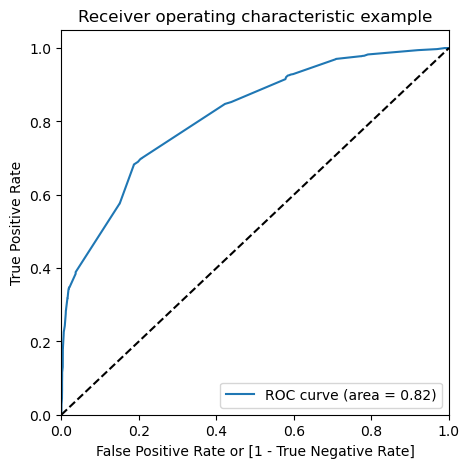

In [119]:
# Drawing ROC curve for train set
draw_roc(Y_train_pred_final["Converted"], Y_train_pred_final["Converted_Prob"])

<font color = "red" >Note:</font> Area under the ROC curve is 0.82 out of 1 which indicates a good predective model

***9.D.1 Finding Optimal Cutoff Point/Probibility***
- It is the probability that where we get **Balanced Sensitivity** and **Specificity**

In [120]:
# let's create columns with different probability cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers: 
    Y_train_pred_final[i] = Y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.586180         1871          1    1    1    1    1    1   
1          0        0.083241         6795          0    1    0    0    0    0   
2          0        0.252261         3516          0    1    1    1    0    0   
3          0        0.554132         8105          1    1    1    1    1    1   
4          0        0.252261         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    0    0    0    0  
4    0    0    0    0    0

In [121]:
# Now let's calculated accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns = ["prob", "accuracy", "sensi", "speci"])

# TP = Confusion[1,1] # True  Positive
# TN = Confusion[0,0] # True  Negative
# FP = Confusion[0,1] # False Positive
# FN = Confusion[1,0] # False Negative

num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final["Converted"], Y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy= (cm1[0,0] + cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.513142  0.977697  0.226887
0.2   0.2  0.607297  0.927007  0.410295
0.3   0.3  0.757421  0.698702  0.793603
0.4   0.4  0.759431  0.689781  0.802349
0.5   0.5  0.762832  0.681265  0.813093
0.6   0.6  0.739023  0.347121  0.980510
0.7   0.7  0.738559  0.345904  0.980510
0.8   0.8  0.730210  0.317518  0.984508
0.9   0.9  0.700835  0.225061  0.994003


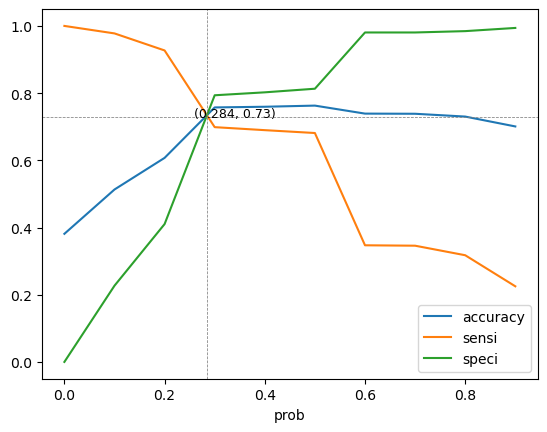

In [122]:
# let's plot accuracy sensitivity and specificity for various probabilities

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection poits od the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df["prob"], cutoff_df["sensi"], kind = "linear")
acc_interp = interp1d(cutoff_df["prob"], cutoff_df["accuracy"], kind = "linear")
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Finding the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df["prob"], cutoff_df["speci"], kind = "linear")
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculated the average of the two intersection points
intersection_x = (intersection_1 + intersection_2)/2

# Interpolate the accuracy, sensitivity, & specificity at intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plotting the three curves and add vertical & horizontal lines at intersection point
cutoff_df.plot.line(x = "prob", y = ["accuracy", "sensi", "speci"])
plt.axvline(x = intersection_x, color = "grey", linewidth = 0.55, linestyle="--")
plt.axhline(y = accuracy_at_intersection, color = "grey", linewidth = 0.55, linestyle="--")

# Adding annotation to display x,y intersection point co-ordinates
plt.annotate(
    f"({intersection_x}, {accuracy_at_intersection})", 
    xy= (intersection_x, accuracy_at_intersection), 
    xytext = (20,0), 
    textcoords = "offset points", 
    ha = "center", fontsize = 9,
)

# Displaying here using a plot show

plt.show()

<font color = "red">Note:</font> According to the above plot 0.284 is the approximate. The point where all the curves meet, so 0.284 seems to be our Optimal cutoff point for probability threshold.

- Will be mapping again using optimal cutoff point


In [123]:
Y_train_pred_final["final_predicted"] = Y_train_pred_final["Converted_Prob"].apply( lambda x: 1 if x > 0.284 else 0)

# Eliminating the not required columns from dataframe
#used this>>>> #Y_train_pred_final.drop([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, "Predicted"], axis=1, inplace=True)

Y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.586180         1871          1    1    1    1    1    1   
1          0        0.083241         6795          0    1    0    0    0    0   
2          0        0.252261         3516          0    1    1    1    0    0   
3          0        0.554132         8105          1    1    1    1    1    1   
4          0        0.252261         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    0    0    0    0                1  
4    0    0    0    0    0                0

***9.E) Calculating all metrics using confusion matrix for train***

In [124]:
# Checking the over all accuracy
print(metrics.accuracy_score(Y_train_pred_final["Converted"], Y_train_pred_final["final_predicted"]))

# or can also be found using confusion matrix with formula, let's find all matrix in one go head using UDF

0.7575757575757576


In [125]:
# UdF for all Logistic Regression Metrics
def logreg_all_metrics(Confusion_matrix): 
    TP = Confusion[1,1] # True  Positive
    TN = Confusion[0,0] # True  Negative
    FP = Confusion[0,1] # False Positive
    FN = Confusion[1,0] # False Negative

    accuracy = (TN + TP)/(TN + TP + FN + FP)
    sensi = TP/(TP + FN)
    speci = TN/(TN + FP)
    precesion = TP/(TP + FP)
    recall = TP/(TP + FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

# Calculating false positive rate - predicting conversion when customer not have converted

    FPR = FP/(FP + TN)
    FNR = FN/(FN + TP)

    print ("True  Negative                  : ",  TN)
    print ("True Positive                   : ",  TP)
    print ("False Negative                  : ",  FN)
    print ("False Positive                  : ",  FP)


    print ("Model Accuracy                  :", round(accuracy, 4))
    print ("Model Sensitivity               :", round(sensi, 4))
    print ("Model Specificity               :", round(speci, 4))
    print ("Model Precision                 :", round(precesion  , 4))
    print ("Model Recall                    :", round(recall, 4))
    print ("Model True Positive Rate (TPR)  :", round(TPR, 4))
    print ("Model False Positive Rate (TPR) :", round(TPR, 4))

In [126]:
# Finding the Confusion metrics for "Y_train_pred_final" df
confusion_matrix = metrics.confusion_matrix(Y_train_pred_final["Converted"], Y_train_pred_final["final_predicted"])
print("*"*45, "\n")

print("Confusion Matrix")
print(confusion_matrix, "\n")

print("*"*45, "\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*45, "\n")

********************************************* 

Confusion Matrix
[[3176  826]
 [ 742 1724]] 

********************************************* 

True  Negative                  :  3254
True Positive                   :  1680
False Negative                  :  786
False Positive                  :  748
Model Accuracy                  : 0.7628
Model Sensitivity               : 0.6813
Model Specificity               : 0.8131
Model Precision                 : 0.6919
Model Recall                    : 0.6813
Model True Positive Rate (TPR)  : 0.6813
Model False Positive Rate (TPR) : 0.6813


********************************************* 



***9.F) Precesion an Recll Tradeoff***
 - Let's compare all metrics of Precision-Recall view with Specificity-Sensitivity view and get better probability threshold for boosting conversion rate to 75.75% as might asked by the CEO.

In [127]:
# Creating precision-recall tradeoff curve
# Used this in erlier step>>> Y_train_pred_final["Converted"], Y_train_pred_final["final_prediction"]
p, r, thresholds = precision_recall_curve(Y_train_pred_final["Converted"], Y_train_pred_final["Converted_Prob"])

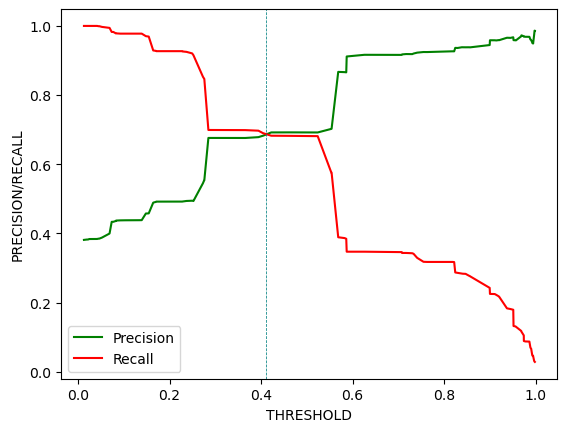

In [128]:
# PLot precision - recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label = "Precision")
plt.plot(thresholds, r[:-1], "r-", label = "Recall")

# Add legend and axis labels
plt.axvline(x = 0.41, color = "teal", linewidth = 0.55, linestyle = "--")
plt.legend(loc = "lower left")
plt.xlabel("THRESHOLD")
plt.ylabel("PRECISION/RECALL")

plt.show()

<font color = "red">Note:</font> The intersection point of the threshold value where the model achieves a balance between precision and recall. 
    It can be used to optimise the performance of the model on business requirement, Here our probability threshold is 0.41 aprrox from the above curve.

In [129]:
# Copying df to test model evaluation with precision recall threshold of 0.41
Y_train_precision_recall = Y_train_pred_final.copy()

In [130]:
# Assigning a feature for 0.41 cutoff from the precision recall curve to see which one is best view (sensi speci or precision-recall)
Y_train_precision_recall["precision_recall_prediction"] = Y_train_precision_recall["Converted_Prob"].apply(lambda x: 1 if x > 0.41 else 0)
Y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.586180         1871          1    1    1    1    1    1   
1          0        0.083241         6795          0    1    0    0    0    0   
2          0        0.252261         3516          0    1    1    1    0    0   
3          0        0.554132         8105          1    1    1    1    1    1   
4          0        0.252261         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  precision_recall_prediction  
0    1    0    0    0    0                1                            1  
1    0    0    0    0    0                0                            0  
2    0    0    0    0    0                0                            0  
3    1    0    0    0    0                1                            1  
4    0    0    0    0    0                0                            0

In [131]:
# Finding the Confusion metrics for "Y_train_pred_final" df
confusion_matrix = metrics.confusion_matrix(Y_train_precision_recall["Converted"], Y_train_precision_recall["precision_recall_prediction"])
print("*"*45, "\n")

print("Confusion Matrix")
print(confusion_matrix, "\n")

print("*"*45, "\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*45, "\n")

********************************************* 

Confusion Matrix
[[3253  749]
 [ 783 1683]] 

********************************************* 

True  Negative                  :  3254
True Positive                   :  1680
False Negative                  :  786
False Positive                  :  748
Model Accuracy                  : 0.7628
Model Sensitivity               : 0.6813
Model Specificity               : 0.8131
Model Precision                 : 0.6919
Model Recall                    : 0.6813
Model True Positive Rate (TPR)  : 0.6813
Model False Positive Rate (TPR) : 0.6813


********************************************* 



Note:
 - As we can see in the above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate, Sensitivity, Recall dropped to around 75%, but we need it close to 80% as the Business Objective.
 - 80% for the metrics we are getting with sensitivity-specificity cut-off threshold of 0.284, So, we will go with sensitivity-specificity view for our Optimal cur-off for final predications.

# <font color = "purple">Adding Lead Score Feature to Training dataframe</font>

- A higher score would mean that the lead is hot, i.e is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly notget converted

In [132]:
# let's ass Lead Score
Y_train_pred_final["Lead_Score"] = Y_train_pred_final["Converted_Prob"].map(lambda x: round(x*100))
Y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.586180         1871          1    1    1    1    1    1   
1          0        0.083241         6795          0    1    0    0    0    0   
2          0        0.252261         3516          0    1    1    1    0    0   
3          0        0.554132         8105          1    1    1    1    1    1   
4          0        0.252261         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    1    0    0    0    0                1          59  
1    0    0    0    0    0                0           8  
2    0    0    0    0    0                0          25  
3    1    0    0    0    0                1          55  
4    0    0    0    0    0                0          25

# <font color = "purple">Step 10: Making Predictions on Test Set</font>

***10.A) Scaling Test dataset***

In [133]:
# To Check the information in test dataset
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   object 
 5   Free_Copy                                 2772 non-null   int64  
 6   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 7   Lead Origin_Quick Add Form                2772 non-null   uint8  
 8   Lead Source_Facebook                      2772 non-null   uint8  
 9   Lead Source_Google                        2772 non-null   uint8  
 10  Lead Source_Olark Chat           

In [134]:
# Fetching int64 and the float64 dtype columns from dataframe for scaling
num_colns = X_test.select_dtypes(include = ["int64", "float64"]).columns

#scaling columns
X_test[num_colns] = scaler.transform(X_test[num_colns])

X_test = X_test[rfe_colns]
X_test.head()

Do Not Email  Lead Origin_Landing Page Submission  Lead Source_Facebook  \
4269     -0.291638                                    0                     0   
2376     -0.291638                                    0                     0   
7766     -0.291638                                    0                     0   
9199     -0.291638                                    0                     0   
4359     -0.291638                                    0                     0   

      Lead Source_Reference  Lead Source_Welingak Website  \
4269                      0                             0   
2376                      1                             0   
7766                      0                             0   
9199                      0                             0   
4359                      1                             0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      Last Activity_Others  Last Activity_SMS Sent  Specialization_Others  \
4269                     0                       1                      1   
2376                     0                       1                      1   
7766                     1                       0                      0   
9199                     0                       0                      1   
4359                     0                       0                      0   

      Current_occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                        0

***10.2) Prediction on Test dataset using Final Model***

In [135]:
# Adding constant value
X_test_sm = sm.add_constant(X_test)

X_test_sm.shape

(2772, 12)

In [136]:
# Making prediction using model 4 [The Final Model]
Y_test_pred = logm5.predict(X_test_sm)

In [137]:
# On Top 10 columns
Y_test_pred[:10]

4269    0.523759
2376    0.899618
7766    0.974275
9199    0.068920
4359    0.920274
9186    0.554132
1631    0.276014
8963    0.252261
8007    0.154554
5324    0.554132
dtype: float64

In [138]:
# Changing to the dataframe of predicted probability
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

0
4269  0.523759
2376  0.899618
7766  0.974275
9199  0.068920
4359  0.920274

In [139]:
# Converting Y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)
Y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [140]:
# Putting Prospect ID to index
Y_test_df["Prospect ID"] = Y_test_df.index

# Removing index for both dataframes to append them side byb side
Y_test_pred.reset_index(drop = True, inplace = True)
Y_test_df.reset_index(drop = True, inplace = True)

# Appending Y_test and Y_test_pred
Y_pred_final = pd.concat([Y_test_df, Y_test_pred], axis = 1)
Y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.523759
1          1         2376  0.899618
2          1         7766  0.974275
3          0         9199  0.068920
4          1         4359  0.920274

In [141]:
# Renaming the column
Y_pred_final = Y_pred_final.rename(columns = {0: "Converted_Prob"})

# Rearranging the columns 
Y_pred_final = Y_pred_final.reindex(["Prospect ID", "Converted", "Converted_Prob"], axis = 1)

Y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.523759
1         2376          1        0.899618
2         7766          1        0.974275
3         9199          0        0.068920
4         4359          1        0.920274

In [142]:
# Taking sensitivity-specificity method at 0.287 probability cutoff during training
Y_pred_final["final_predicted"] = Y_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.284 else 0)
Y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.523759                1
1         2376          1        0.899618                1
2         7766          1        0.974275                1
3         9199          0        0.068920                0
4         4359          1        0.920274                1

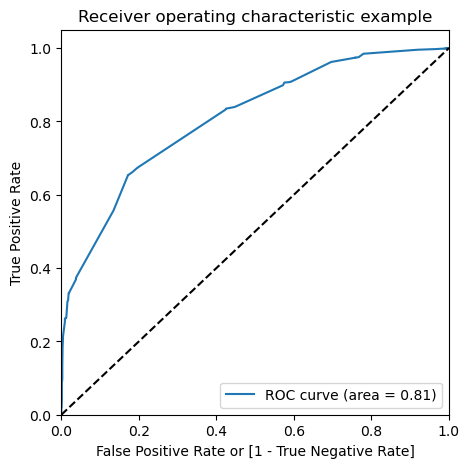

In [143]:
# Drawing ROC curve for Test Set
fpr, tpr, threshold = metrics.roc_curve(Y_pred_final["Converted"], Y_pred_final["Converted_Prob"], drop_intermediate = False)
draw_roc(Y_pred_final["Converted"], Y_pred_final["Converted_Prob"])

<font color = "red">Note:</font> Area under curve is 0.81 out of 1 which indicates a good predictive model </font>

<font color = "red">Note:</font> 
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.

- We will do this by comparing the predicted labels(final_predicted) to the actual labels(Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

***10.3) Test Set Model Evaluation***
- Calculating all metrics using confusion matrix for Test Set


In [144]:
# Finding the Confusion metrics for "Y_train_pred_final" df
confusion_matrix = metrics.confusion_matrix(Y_pred_final["Converted"], Y_pred_final["final_predicted"])
print("*"*45, "\n")

print("Confusion Matrix")
print(confusion_matrix, "\n")

print("*"*45, "\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*45, "\n")

********************************************* 

Confusion Matrix
[[1347  330]
 [ 357  738]] 

********************************************* 

True  Negative                  :  3254
True Positive                   :  1680
False Negative                  :  786
False Positive                  :  748
Model Accuracy                  : 0.7628
Model Sensitivity               : 0.6813
Model Specificity               : 0.8131
Model Precision                 : 0.6919
Model Recall                    : 0.6813
Model True Positive Rate (TPR)  : 0.6813
Model False Positive Rate (TPR) : 0.6813


********************************************* 



<font color = "Red">Note:</font> The evaluation matrix are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- For the Test Set:

 >Accuracy: 76.28% 

 >Sensitivity: 68.13%

 >Specificity: 81.31%
 
 These matrics are very close to train set, so out final model logm5 is performing with good consistency on both Train & Test Set

In [145]:
# Features and their co-efficient from final model
parameters = logm5.params.sort_values(ascending = False)
parameters

Lead Source_Welingak Website               4.527226
Current_occupation_Working Professional    2.751276
Lead Source_Reference                      2.097878
Last Activity_SMS Sent                     1.916702
Last Activity_Others                       1.269748
Last Activity_Email Opened                 0.735003
Do Not Email                              -0.321580
const                                     -0.480590
Last Activity_Olark Chat Conversation     -0.781808
Lead Origin_Landing Page Submission       -1.312519
Lead Source_Facebook                      -1.314791
Specialization_Others                     -1.434790
dtype: float64

<font color = "Red">Note:</font> A high positive co-efficients indicates that a variable has a strong influence on predicting the probability of leads converting to take up X-Education course.

# <font color = "purple">Adding Lead Score Feature to Test dataframe</font>

- A higher score would mean that the lead is hot i.e. is most likely to convert.
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [146]:
# Let's add Lead Score

Y_pred_final["Lead_Score"] = Y_pred_final["Converted_Prob"].map(lambda x: round(x*100))
Y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.523759                1          52
1         2376          1        0.899618                1          90
2         7766          1        0.974275                1          97
3         9199          0        0.068920                0           7
4         4359          1        0.920274                1          92

Lead Score: Lead Score is assigned to the customers 

   - The customers with a higher lead score have a higher conversion chance.
   - The customers with a lower lead score have a lower conversion chance.

# <font color = "purple">🤗 CONCLUSION</font>
▶ Train - Test

<b><font color = "red">Train Data Set:</font></b>

-  Accuracy                  : 76.28%
-  Sensitivity               : 68.13%
-  Specificity               : 81.31% 

<b><font color = "red">Test Data Set:</font></b>

-  Accuracy                  : 76.28%
-  Sensitivity               : 68.13%
-  Specificity               : 81.31% 

Note: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

  - The model achieved a sensitivity of 68.13% in the train set and 68.13% in the test set, using a cut-off value of 0.284.
  - Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
  - The CEO of X Education had set a target sensitivity of around 80%.
  - The model also achieved an accuracy of  76.28%, which is in line with the study's objectives.

# <font color = "Brown">Model Parameters:</font> 
 - The final Logistic Regression Model has 11 features
 
 ------------------------------------------------------------
 
 Top 3 Features that contributing Positivesly to pretending hot leads in the model are: 
 
 - Lead Source_Welingak Website
 
 - Current_occupation_Working Professional
 
 - Lead Source_Reference
 
<font color = "Red" >Note:</font> The optimal cutoff probability point is 0.284. Converted probability greater than 0.284 will be predicted as Converted lead (Hot Lead) & Probability smaller than 0.284 will be predicted as not Converted lead(Cold Lead)

# 🔴 <font color = "purple">RECOMMENDATIONS</font>

<b><font color = "blue">To increase our Lead Conversion Rates:</font></b>

- Focus on features with positive co-efficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Optimizing communication channels based on lead engagement impact.
- Engage working professionals with tailored messaging.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have conversion rate and will have better financial situation to pay higher fees too.

<b><font color = "blue">To identify areas of improvement:</font></b>

 - Analyze negative co-efficients in specialization offerings.
 - Review landing page submission process for areas of improvement.